# Grocery Checkout Simulation

### Abstract

This project aims to construct an event-driven system that simulates checkout lines in grocery stores. Grocery stores usually have significantly different volumes of customers during different time intervals in a day, which makes it inefficient to keep a fixed number of checkout lines open for the whole day, since it is expensive to keep all lanes open when there are few customers, while opening an insufficient number of lines during peak hours may annoy customers significantly. Our project will simplify such situations into an event-driven simulation system and explore the relationship between the number of open lanes and the arrival rate of customers to the checkout stations.

### System Description

Grocery stores have a steady demand and large volume of customers every day, so it is common for grocery stores to have multiple checkout lanes and various lanes, such as human service lanes and auto-check and express checkout lanes. However, the number of customers in a grocery store varies a lot during different times of the day. According to Google Maps, the Publix at Atlantic Station has rush hours that start from around 12 PM and reach its peak at 7 PM, while the peak number of visitors per hour could be 4 - 5 times the number of visitors at 7 AM. Thus, it is inefficient to keep a fixed number of checkout lanes open regardless of the number of customers because each open line adds to the total operation cost, such as the hourly pay for cashiers, so it is expensive to keep all lanes open when there are few customers. However, if there are few open lines during peak hours, the customers may get dissatisfied and may not continue to visit the store as frequently, which also leads to a potential loss in revenue.

### Literature Review

Retail store operation has always been an interest for researchers, including staffing schedules, shop layouts, and customer flows, etc. Opara-Nadi (2005) studied the difference between express checkouts and regular checkouts and suggested that express checkouts were better in terms of time efficiency. However, the shortcoming of increased possibilities for having errors in express checkouts is also obvious compared with regular checkouts. There are many researchers taking simulations to solve mathematical problems. Schimmel (2013) studied the effects of express checkouts on waiting time in a supermarket by exploring two different queueing models using base case and worst case and comparing the result. The conclusion shows that regular and express checkouts experience larger queues even though express checkout customers experience shorter waiting times. Besides, Yamane (2012) investigated the best checkout layout for a local retail store in Japan and managed to eliminate congestion issues which could also be extended to a combination between congestion and time in the queue. As in the proposal, we will examine two factors, checkout line picking preferences and different checkout station layouts, to discover their effects on the customer’s total checkout time in the system.

In Simulation Modeling of Customer Checkout Configurations, Rossetti and Pham (2015) constructed a discrete event simulation model through Java Simulation Library (JSL) for both the shopping and checking-out behaviors based on the First Annual IIE/Arena Contest problem: The SM Superstore (Kelton et al. 2007). In their proposed models, customers will first start shopping in the shopping aisles for several items upon arrival and then go to the checkout area, where they may choose either a cashier checkout line, an express checkout line, or a self-checkout line, while a self-checkout line may also be a regular line or an express line. During checkout, a cashier will scan the items, a bagger will help to bag the items, and eventually, the customer will pay. The arrival of a customer is generated by a non-homogeneous Poisson process, while other parameters such as time for scanning, bagging, and paying are given. Our project is inspired by Rossetti and Pham’s work with a focus on checkout behavior.

### Conceptual Model

<div style="text-align: center">
    <img src="./img/concept-1.png" alt="Conceptual-model-1" width="40%" style="display: inline; padding-right:5%;"/>
    <img src="./img/concept-2.png" alt="Conceptual-model-2" width="40%" style="display: inline; padding-left: 5%;"/>
</div>

#### A Queueing Model

We will treat the checkout zone as multiple first-come-first-serve (FCFS) queues. A simulated customer arrives at the checkout zone and picks a checkout line using one of the heuristics described below. If the line is empty, the customer begins checkout/receives service immediately. Otherwise, they will enter the end of the queue and wait until it is their turn.

After the checkout is finished, the customer will remind the next customer behind them in the queue (if there is any) to begin another checkout. This is done from a simulator implementation perspective. Then, the customer will leave the system.

The simulator will record how long each customer stays in the queue and the duration of the checkout process. The aggregate results can be used for statistical analysis.

#### Event Flowchart

From each customer's perspective, the following flow chart illustrates their events in order.

<img src="./img/concept-3.png" alt="Conceptual-model-3" width="35%" />

#### System Assumptions

It is also worth mentioning some assumptions we made to simplify the system development.

- The system boundary is limited to the checkout zone of a grocery store: picking up groceries from the shelf is not simulated.
- Each customer performs the following activities while in the system:
    1. Arrive at checkout zone
    2. Pick a checkout line
        - If the line is queueing, wait in that checkout line until called
    3. Scan Items (by the cashier or themself) and pay for the grocery purchase
    4. Leave the checkout zone
- Grocery items are generic. We count their quantities but ignore their types.
- Customers do not leave or switch lines once they pick one.
- The checkout lines have infinite queueing capacities.
- Customers may use express checkout only if they strictly have no more than 10 items.
- Customers arrive at the checkout zone randomly and independently following a Poisson process.
- The traffic to the checkout zone (customer arriving rate) can vary with the hour in a day.
- The time to scan a grocery item is constant or normally distributed.
- The time to complete grocery payment is constant or normally distributed.

#### Data Source for Customer Arrivals

Due to the difficulty in obtaining real data from grocery stores in practice and the potentials for privacy violations, we have created a data generator for generating random virtual data to feed into the simulator. You will see how exactly we do it in the next part.

#### Checkout Time Function

We are assuming the checkout time $T$ for each customer is deterministically dependent on the number of items they purchase $N$ and the type of checkout line they use. There are 3 types of checkout lines in this simulation, cashier, express, and self-checkout lines. Specifically,

$$
    T_{cashier} = N + 7
$$
and
$$
    T_{express} = N + 4
$$
and
$$
    T_{self} = 2 N + 1
$$

The intuition behind it is that an experienced cashier spends roughly the same amount of time (~1 second) to scan a grocery item regardless of what line (regular/express) they are in, but an express checkout line, in general, has less overhead, so it has s smaller constant term. For example, the constant term represents the time need for payment.

A self-checkout line is not operated by a cashier, but an inexperienced customer will likely spend twice as much time on a single item.

#### Line Selection Algorithm/Heuristic

Just like you cannot confidently tell what a customer likes to purchase, customer queueing preferences are hard to predict, too. Therefore, we come up with several heuristics of how a customer selects a checkout line.

- **Pure Random**
    - As the name suggests, it's not based on any rules. The customer randomly selects an available line and goes for it.
    - It serves as a bottom line in terms of measuring simulation performance.
- **Least Person**
    - The customer selects the line with the least number of people waiting in that line.
    - This is closest to reality.
- **Least Item**
    - The customer selects the line with the least number of items held by the people waiting in that line.
    - This is not realistic as customers do not count this quantity during checkout.
    - However, it "seems" more efficient, so we will do it from a simulation perspective.
- **Least Time**
    - The customer selects the line with the least *expected* queueing time determined by customers waiting ahead.
    - This is not realistic as customers won't bother calculating this quantity during checkout.
    - However, it "seems" more efficient, so we will do it from a simulation perspective.
- **Round-Robin**
    - Each checkout line takes turns to accept new customers.
    - This is also not realistic as customers cannot be forcibly assigned a line to use.
    - This is a "fair" algorithm, though. The fact that it avoids the selfishness of customers may increase efficiency from the least person heuristic.

We will explore the effect of one or more of these different customer queueing behaviors.

## Part 0: Simulator Implementation 

*TODO: Run the following cell to import simulation code modules and other libraries.*

In [1]:
# auto-reload on code change
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline
plt.rcParams['figure.dpi'] = 120 # 200 e.g. is really fine, but slower

from simulation.data_generator import DataGenerator
from simulation.utility import Utility
from simulation.simulator import Simulator
from simulation.event import *

The project code directory has the following structure.

- Entities
    - Customer `customer.py`
    - Checkout Line `checkout_line.py`
    - Grocery Store `grocery_store.py`
- Events `event.py`
    - JoinCheckoutEvent
    - BeginCheckoutEvent
    - FinishCheckoutEvent
    - LineCloseEvent
    - LineOpenEvent
- Simulator
    - Utility Functions `utility.py`
    - Data Generator `data_generator.py`
    - Simulator `simulator.py`

This is an event-driven simulation project, so a large portion is the implementation of the simulator itself. You can further inspect the simulator and data generator code in the code directory.

## Part 1: Simulator Run Demo

Before we dive into the experimentation of the grocery checkout queueing model, we must understand how the simulator we just wrote works and produces output.

Aside from the simulator itself, it is also worth mentioning that we have created a data generator for generating random virtual data to feed into the simulator. We observed that using virtual data obtained from a probability distribution prior already yields somewhat insightful data that can be used to explain reality.

### Random Data Generator

The random data generator we designed takes a list of tuples each of which reflects the number of customers arriving at the checkout zone in a given time interval. Each tuple is formatted in the following way:

(**`start_timestamp`**, **`end_timestamp`**, **`number_of_customers`**, **`distribution_type`**, **`param_1`**, **`param_2`**)

|Field|Meaning|
|--|--|
|`start_timestamp`|The *start* timestamp of the interval in *seconds*|
|`end_timestamp`|The *end* timestamp of the interval in *seconds*|
|`number_of_customers`|Number of customers arriving in this interval|
|`distribution_type`|The *distribution type* for **number of grocery items**|
||Can be `"uniform"` or `"gaussian"`|
|`param_1`|The $1^{\text{st}}$ distribution parameter|
||*min* for uniform , *mean* for gaussian|
|`param_2`|The $2^{\text{nd}}$ distribution parameter|
||*max* for uniform , *standard deviation* for gaussian|

This format allows input generation according to a time-varying customer arrival rate controlled by `start_timestamp` $T_{start}$, `end_timestamp` $T_{end}$, and `number_of_customers` $N$, which will be useful when we want to model a more realistic customer arrival scheme in a typical day with "rush hours". The `arrival_rate` $\lambda$ can be calculated as

$$
    \lambda = \frac{N}{T_{end} - T_{start}} \text{ customers per second }
$$

Normally, we can simply assume the number of grocery items purchased by each customer follows a uniform distribution, but alternatively, a gaussian variable would also be a good assumption in special cases. Therefore, we allow both `"uniform"` and `"gaussian"` to pass into our data generator.

*TODO: Run the following cell to initialize and run the data generator.*

In [292]:
# OPTIONAL: Define RNG seeds to generate fixed simulator input
input_seed = 251

# Generate initial event list.
data_gen = DataGenerator(input_seed)
dist_params = [
    (0, 50, 10, "uniform", 1, 21),
    (50, 100, 15, "gaussian", 10, 4),
    (100, 200, 20, "uniform", 1, 21)
]
initial_events_str = data_gen.generate_time_varying(dist_params)

After executing the code above, we have generated a random customer arrival scheme stored in variable `initial_events_str` as a string, where each line represents an initial customer arrival event. It is formatted like the following:

`<arrival_timestamp>`, `join`, `<number_of_items>`

Let's print the first and last 10 lines to have a better idea.

*TODO: Run the following cell.*

In [293]:
print("\n".join(initial_events_str.split("\n")[:10]))
print("\n...\n\n...\n")
print("\n".join(initial_events_str.split("\n")[-10:]))

3,join,20
5,join,20
9,join,21
13,join,18
17,join,1
18,join,1
23,join,11
26,join,9
31,join,19
44,join,7

...

...

143,join,9
152,join,3
153,join,20
157,join,21
162,join,4
165,join,16
180,join,10
181,join,20
189,join,2
193,join,11


### Simulator

It's finally time to run the simulator on the generated data. First, let's define the type of checkout lines and how many there are.

For this demo, we have 2 cashier checkout lines, 1 express-checkout line, and 1 self-checkout line.

We are using **linear deterministic checkout time function**, as defined above.

We are using **least person heuristic** for queueing preference, also defined above.

*TODO: Run the following cell to initialize the simulator.*

In [294]:
# Configurations
# Define how many of each type of checkout line you have here.
store_config = {
    "cashier": 2,
    "express": 1,
    "self":    1
}

# OPTIONAL: Define RNG seeds to generate fixed simulator input
sim_seed = 996

# Define assumptions.
#     checkout time
#     checkoutl line selection criterion
Utility.get_checkout_time = Utility.get_checkout_time_deterministic
Utility.pick_checkout_line = Utility.pick_checkout_line_least_person

*TODO: Run the following cell to initialize and start the simulator.*

In [295]:
# Run simulation
sim = Simulator(store_config, random_state=sim_seed)
sim.run(initial_events_str)

Let's inspect the output of the simulation in detail. In particular, we would like to know which customers went to which lines, when they joined that line, when they began checkout, and when they left that line.

*TODO: Run the following cell and inspect the detailed output.*

In [296]:
# Print detailed result
for line in sim.store.lines:
    print("Line ID: %d\nType: %s\nClosed: %s\nCustomers:"
          % (line.id, line.type, line.closed))
    print(len(line.served))
    print("ID\t#items\tt_join\tt_begin\tt_finish")
    for c in line.served:
        print("%d\t%d\t%d\t%d\t%d" % (
            c.id, c.num_items, c.join_timestamp,
            c.begin_timestamp, c.finish_timestamp))
    print()

Line ID: 0
Type: cashier
Closed: False
Customers:
11
ID	#items	t_join	t_begin	t_finish
0	20	3	3	30
3	18	13	30	55
8	19	31	55	81
11	12	56	81	100
19	10	87	100	117
21	9	90	117	133
25	2	102	133	142
28	17	122	142	166
31	20	134	166	193
37	20	153	193	220
42	20	181	220	247

Line ID: 1
Type: cashier
Closed: False
Customers:
13
ID	#items	t_join	t_begin	t_finish
1	20	5	5	32
5	1	18	32	40
9	7	44	44	58
10	13	52	58	78
13	16	65	78	101
18	6	80	101	114
22	6	91	114	127
26	3	116	127	137
29	11	124	137	155
30	16	127	155	178
34	15	140	178	200
39	4	162	200	211
44	11	193	211	229

Line ID: 2
Type: express
Closed: False
Customers:
13
ID	#items	t_join	t_begin	t_finish
4	1	17	17	22
7	9	26	26	39
12	9	61	61	74
14	8	70	74	86
16	10	75	86	100
20	7	88	100	111
23	7	94	111	122
27	10	117	122	136
32	9	136	136	149
35	9	143	149	162
36	3	152	162	169
41	10	180	180	194
43	2	189	194	200

Line ID: 3
Type: self
Closed: False
Customers:
8
ID	#items	t_join	t_begin	t_finish
2	21	9	9	52
6	11	23	52	75
15	14	73	75	104
17	15	77	104	135
24	

We can see the customers are almost evenly spread across different checkout lines. Let's now calculate some statistics.

*TODO: Run the following cell.*

In [297]:
(_, _, min_time, max_time, mean_time, std_time) , raw \
= sim.query_statistics("wait")
print("Min Wait: %d" % min_time)
print("Max Wait: %d" % max_time)
print("Mean Wait: %.2f" % mean_time)
print("Std Wait: %.2f" % std_time)

Min Wait: 0
Max Wait: 55
Mean Wait: 16.67
Std Wait: 13.87


Some customers have to wait in the queue before checkout (in the case `t_join` $<$ `t_begin`) while some get to checkout right away (`Min Wait` = 0). We should now be convinced that our implementation is correct as this quick verification shows.

## Part 2: Experimentation

### 2.1 Single Checkout Line Model

#### 2.1.1 Waiting Time vs. Arrival Rate
We will first experiment with the setting with only one regular cashier line to explore several properties in [queueing theory](https://en.wikipedia.org/wiki/Queueing_theory). For example, we would like to verify that the average queueing time per customer increases as the customer arrival rate increases. The customer arrival rate is measured in the number of customers per minute (60 timestamps).

For the sake of this experiment, we assume customers arrive at a constant rate in 2 hours (7200 timestamps). This will yield more stable results than simulations that run for a shorter duration. The number of grocery items carried by each customer is a uniformly distributed variable between 1 and 20 (inclusive). Customer arrival rates between 0.1 to 3.4 are then tested with a precision of 0.1 customers per minute.

*TODO: Run the following code cells.*

In [298]:
# Define store configuration: store has only 1 cashier line.
store_config = {
    "cashier": 1
}

# Define data generator
input_seed = 251
sim_seed = None # no need for single queue
data_gen = DataGenerator(input_seed)

# Constant setting
SECOND_PER_MINUTE = 60

########## Simultaion settings ##########

# the unit interval, smallvalue helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = 3600 * 2
MIN_ITEM = 1
MAX_ITEM = 20
MIN_ARRIVAL_RATE = 0.1 # customers per minute, inclusive
MAX_ARRIVAL_RATE = 3.5 # customers per minute, exclusive
PRECISION = 0.1

In [299]:
# simulation result: [[arrival_rate, wait_time, service_time]]
ARRIVAL_RATES = np.arange(
    MIN_ARRIVAL_RATE, MAX_ARRIVAL_RATE, PRECISION)
sim_res = []

for arrival_rate in ARRIVAL_RATES:
    dist_params = [(
        0, TOTAL_TIMESTAMP,
        int(ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * arrival_rate),
        "uniform", MIN_ITEM, MAX_ITEM
    )] * (TOTAL_TIMESTAMP // ARRIVE_INTERVAL_SECOND)
    initial_events_str = data_gen.generate_time_varying(dist_params)

    sim = Simulator(store_config, random_state=sim_seed)
    sim.run(initial_events_str)
    
    for line in sim.store.lines:
        for customer in line.served:
            wait_time \
            = customer.begin_timestamp - customer.join_timestamp
            service_time \
            = customer.finish_timestamp - customer.begin_timestamp
            sim_res.append([arrival_rate, wait_time, service_time])

df = pd.DataFrame(
    sim_res, columns=["arrival_rate", "wait_time", "service_time"])

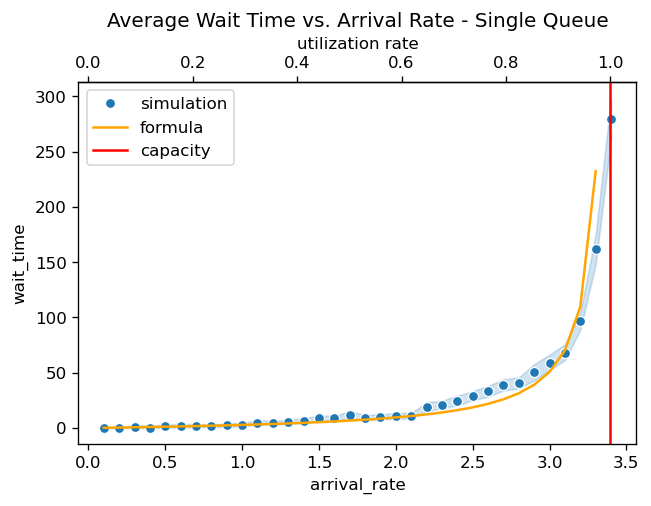

In [300]:
S = df["service_time"].mean()
C = 1 / S * SECOND_PER_MINUTE

# plot simulation result
ax = sns.lineplot(
    data=df, x="arrival_rate", y="wait_time", ci=99,
    label="simulation"
)
ax.lines[0].set_marker("o")
ax.lines[0].set_linestyle("")

# plot prediction curve
VALID_ARRIVAL_RATES = ARRIVAL_RATES[ARRIVAL_RATES < C]
V_S = 1 / 12 * (MAX_ITEM - MIN_ITEM)**2
E_S = (MAX_ITEM + MIN_ITEM) / 2
Cv_2 = V_S / (E_S)**2
rho = VALID_ARRIVAL_RATES / C
VALID_WAIT_TIMES = (1 + Cv_2) / 2 * rho / (1- rho) * E_S
plt.plot(
    VALID_ARRIVAL_RATES, VALID_WAIT_TIMES, "orange", label="formula")

# plot asymptote
plt.axvline(x=C, color="red", label="capacity")

# add secondary x-axis: utilization rate
secax = ax.secondary_xaxis(
    'top', functions=(lambda x: x / C, lambda x: x * C))
secax.set_xlabel('utilization rate')

plt.title("Average Wait Time vs. Arrival Rate - Single Queue")
plt.legend()
plt.show()

Above we have plotted the experimental average wait_time against various arrival rates in 99% *confidence intervals*. We can see the average waiting time per customer increases as customers arrive more frequently in this one checkout line model. It looks like the waiting time changes more steeply and approaches a very large value once the customer arrival rate exceeds one point. This produces a hockey-shaped curve.

We calculate the maximum *expected throughput* of one cashier checkout line. Throughput measures how the number of customers served in an interval. First, we need to calculate the expected checkout time, or **expected service time** ($S$) of a customer as shown below, given that the expected number of grocery items per customer is $E[N] = E[ Uniform(1, 20) ] = (1 + 20) \div 2 = 10.5$. Notice that one can verify that the service time/checkout time is also a uniformly distributed variable by simple probability theory.

$$
    \text{Expected Service Time } = S = E[N] + 7 = 10.5 + 7 = 17.5 \text{ seconds per customer}
$$

Maximum expected throughput is

$$
    max(\text{Expected Throughput}) = C = 1 / 17.5 * 60 = 3.4286 \text{ customers per minute }
$$

This is also known as the **capacity** ($C$) of a single checkout line.

According to queueing theory basics, a queue is *stable* when the average **customer arrival rate** is smaller than the **service rate/capacity** (maximal throughput) of a queue. Once the former exceeds or equals the latter, the queue becomes *unstable*, and on average the queue will start to build up to cause *congestion*.

The service rate for a cashier checkout line is assumed to be fixed in our study. To realize it, the cashier just keeps serving customers in the queue with no breaks. We vary the customer arrival rate as our experiment variable. We then observe that the average waiting time increases rapidly near the place where the customer arrival rate equals the calculated *capacity* (3.4286 customers per minute).

In queueing theory, more than inspecting the raw values of **customer arrival rate** ($\lambda$) and checkout line **service rate** ($\mu$), we are also interested in their quotient ($\rho$), which can be calculated using the following formula:

$$
    \rho = \frac{\lambda}{\mu}
$$

$\rho$ is known as the **utilization** of a queue. It tells for what proportion of time the queue is not empty, which also drives the server (checkout line) busy. In our case, the service rate is capacity, so $\mu = C$. Simple queues like a single checkout line can be classified as the following:

$$
   \begin{cases} 
      \text{stable} & 0 < \rho < 1 \\
      \text{unstable} & \rho \geq 1
   \end{cases}
$$

#### 2.1.2 Pollaczek-Khinchin Mean Formula (for Average Waiting Time)

Besides plotting the experimental result, we can apply the formula of average waiting time for a simple queue and obtain a smooth curve. The average waiting time ($W$) as a function of service time ($S$, a uniform variable) and utilization rate ($\rho$) can be expressed as a function below:

$$
    W(S, \rho) = \frac{1 + C_v^2}{2} \cdot \frac{\rho}{1 - \rho} \cdot E[S]
$$

And $C_v^2$ is defined as

$$
    C_v^2 = \frac{V[S]}{E[S]^2}
$$

where $E[S]$ and $V[S]$ are the expectation and variance of the random variable $S$, the service time, respectively. Given that $S$ is a uniformly distributed variable with bound $[a, b]$,

the expectation is given as

$$
    E[S] = \frac{a + b}{2}
$$

the variance is given as

$$
    V[S] = \frac{(b-a)^2}{12}
$$

Technically speaking, the service time $S$ in our simulation is a discrete variable because we use integer timestamps, but the above equations make a continuous assumption on $S$. However, there is not much literature dealing particularly with the discrete variables, and the prediction/approximation result by a continuous variable assumption is already amazing.

We plot this curve in the above graph in an orange line and see that it aligns very well with our experimental findings. It approaches infinity when utilization approaches 1 and becomes undefined thereafter. In practice, we never want the utilization of a queueing system to get even close to 1 because the wait/response time will be just unbearable. Instead, an empirical value of *$0.6 < \rho < 0.7$* is often chosen. We say that the curve has a ***knee*** near that value.

In theory, the average queuing time should be *inifity* $\infty$ when the arrival rate exactly equals or exceeds the service rate, or in other words, when the utilization $\rho \geq 1$. For this reason, there should be a vertical asymptote at that particular arrival rate, also marked as a red line in the above graph. However, in our experiment the customer stops arriving after the end timestamp, so the checkout line can consume all remaining customers in the queue, and thus the average waiting time predicted by the queueing theory formula seems to *overestimate* the practical result when utilization approaches 1. Nevertheless, the predicted average waiting time is fairly accurate for most utilization rate ($\rho < 0.95$), and we can still see the average waiting time becomes unreasonably large to indicate some severe congestion.

Now, coming back to the formula itself, it is derived by applying Little's Law in queueing theory (discussed below) and some advanced topics in probability theory, which honestly is beyond our ability. For interested readers, we include this [referece](https://www.netlab.tkk.fi/opetus/s383143/kalvot/E_mg1jono.pdf) where we obtained equations above. The reason why the above formula looks so complex is that, in queueing theory jargon, we have an "M/G/1" queue.

1. The first M means the customer arrival rate is specified M, which stands for Markovian. Under this assumption, customers arrive randomly and independently, with an average rate $\lambda$. This is exactly how our data generator produces customer arrival data. These arrival events are also said to be generated by a Poisson process. Particularly, the inter-arrival time is exponentially distributed, with mean $\frac{1}{\lambda}$.

2. The second parameter as G suggests how service time $S$ is distributed. G here means the distribution of $S$ can be gaussian or an arbitrary one. In our case, it is uniform, which surprisingly makes the calculation of average waiting time particularly complex, involving the formula described above.

3. The third position indicates the number of servers. In our simplest examples like this one, there is only 1 server. Queuing systems with multiple servers are considerably more complex, denoted as "k" or "n". In fact, queueing with multiple servers is still an area under active research, with many approximation results and few closed-form solutions.

For more information about queue categorization (there are many types of them, like M/M/1, M/G/k ...), check out this [source](https://cdn2.hubspot.net/hubfs/498921/eBooks/queueing-theory_1-1.pdf).

#### 2.1.3 Little's Law

For a long time, people had believed that there is a *direct relationship* between the **average length of the queue** ($L_q$) and the **average total time** ($W_q$) per customer. The total time is the time a customer spends in the system, which equals the sum of wait time and service time. Particularly, people have empirically found the two quantities are linked by the coefficient $\lambda$, the **arrival rate** of customers.

No one had rigorously proved this relationship, but its property is widely observed in many types of queueing systems, including the grocery checkout example we do here. It remained an important observation until [John Little](https://en.wikipedia.org/wiki/John_Little_(academic)), a professor from Massachusetts Institute of Technology and researcher in queueing theory, demonstrated a mathematical proof later known as Little's Law. It is simply stated as:

$$
    L_q = \lambda W_q
$$

This is the basis used to prove many other things in queueing theory. One thing to note here is that it only applies when the queue is stable (utilization $\rho$ < 1). Still, it aligns well with people's observations most of the time, so we would like to verify this relationship with our checkout simulator as well. In the experiment below, we will again vary the customer arrival rate $\lambda$ in every trial, record the average total time ($W_q$), and then observe the average length of the queue ($L_q$).

To calculate $W_q$, we take the average of each customer's total time in the checkout line. To estimate $L_q$, we create a special event that counts the number of customers in the checkout line in every timestamp (or some fixed intervals). Then we can easily calculate the average length of the queue over time.

*TODO: Run the following code cell to define this custom event.*

In [301]:
# There is no predefined Event subtype to count number of customers in
# a checkout line. We will have to first define such Event ad-hoc:
# CountQueueLengthEvent.

class CountQueueLengthEvent(Event):
    """The event to count the length of queues for all checkout lines.
    
    This is a custom event. No new event will be spawned after it.
    It will save its result (a list of queue lengths) after execution.

    === Attributes ===
    @type timestamp: int
        A timestamp for this event.
    @type lengths: list[int]
        Number of customers in each checkout line.
    @type closed: list[bool]
        If each checkout line is closed
    """
    
    def __init__(self, timestamp):
        """Initialize an Event with a given timestamp.

        @type self: Event
        @type timestamp: int
            A timestamp for this event.
        @rtype: None
        """
        super().__init__(timestamp, customer=None, line=None)
        self.lengths = None
        self.closed = None
        
    
    def do(self, store):
        """Perform this Event.
        
        Count customers in queues.
        
        @type self: CountQueueLengthEvent
        @type store: GroceryStore
        @rtype: list[Event]
            A list of events generated by performing this event.
        """
        self.lengths = []
        self.closed = []
        for line in store.lines:
            self.lengths.append(line.get_num_customers())
            self.closed.append(line.closed)
        return []

The remaining setups are very similar to the preceding section.

*TODO: Run the following cells.*

In [302]:
# Define store configuration: store has only 1 cashier line.
store_config = {
    "cashier": 1
}

# Define data generator
input_seed = 251
sim_seed = None # no need for single queue
data_gen = DataGenerator(input_seed)

# Constant setting
SECOND_PER_MINUTE = 60

########## Simultaion settings ##########

# the unit interval, small value helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = 3600 * 2

COUNT_STEP = 10 # how often to count queue lengths, in seconds
MIN_ITEM = 1
MAX_ITEM = 20
MIN_ARRIVAL_RATE = 0.1 # customers per minute, inclusive
MAX_ARRIVAL_RATE = 3.5 # customers per minute, exclusive
PRECISION = 0.1

In [303]:
# simulation result: [[arrival_rate, avg_wait_time, avg_queue_length]]
ARRIVAL_RATES = np.arange(
    MIN_ARRIVAL_RATE, MAX_ARRIVAL_RATE, PRECISION)
sim_res = []
service_times = []

for arrival_rate in ARRIVAL_RATES:
    dist_params = [(
        0, TOTAL_TIMESTAMP,
        int(ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * arrival_rate),
        "uniform", MIN_ITEM, MAX_ITEM
    )] * (TOTAL_TIMESTAMP // ARRIVE_INTERVAL_SECOND)
    initial_events_str = data_gen.generate_time_varying(dist_params)

    sim = Simulator(store_config, random_state=sim_seed)
    
    # Add the custom events to count queue lengths here
    count_events = []
    for timestamp in range(0, TOTAL_TIMESTAMP+1, COUNT_STEP):
        count_event = CountQueueLengthEvent(timestamp)
        count_events.append(count_event)
        sim.events.put(count_event)
    
    sim.run(initial_events_str)
    
    trial_res = []
    for line in sim.store.lines:
        for customer in line.served:
            total_time \
            = customer.finish_timestamp - customer.join_timestamp
            service_times.append(
                customer.finish_timestamp - customer.begin_timestamp)
            trial_res.append([total_time])
    trial_res = np.array(trial_res)
    
    total_waiting = 0
    for count_event in count_events:
        total_waiting += np.sum(count_event.lengths)
    
    sim_res.append([
        arrival_rate,
        trial_res[:, 0].mean(),
        total_waiting / len(count_events)
    ])



df = pd.DataFrame(
    sim_res, columns=[
        "arrival_rate", "avg_total_time", "avg_queue_length"])

Let's first plot the average queue length ($L_q$) as a function of arrival_rate ($\lambda$). The shape of the curve should look very familiar to you, and it makes intuitive sense. There is again a vertical asymptote near utilization $\rho = 1$.

We also calculate the predicted average queue length ($\hat{L_q}$) by applying Little's Law. We will plot this curve on the same graph to show how it aligns well with our experiment.

*TODO: Run the following cell to produce a plot.*

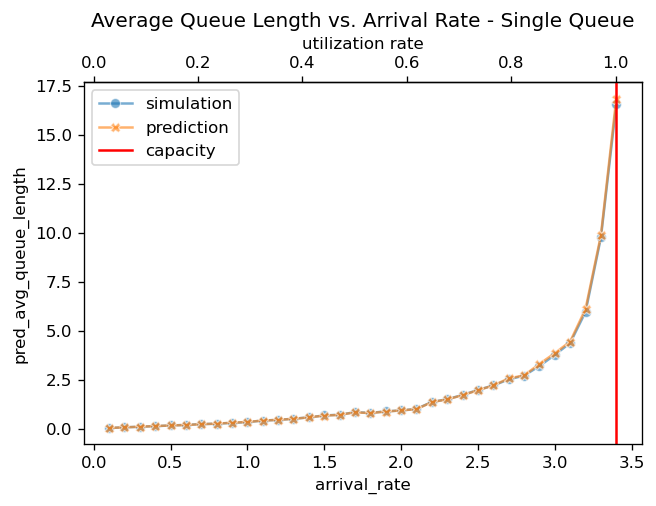

In [304]:
S = np.mean(service_times)
C = 1 / S * SECOND_PER_MINUTE

# simulation
ax = sns.lineplot(data=df, x="arrival_rate", y="avg_queue_length",
                  label="simulation", alpha=0.6, marker="o")

# plot Little's Law prediction
df["pred_avg_queue_length"] \
= df["arrival_rate"] * df["avg_total_time"] / SECOND_PER_MINUTE
sns.lineplot(data=df, x="arrival_rate", y="pred_avg_queue_length",
             label="prediction", alpha=0.6, marker="X")

# plot asymptote
plt.axvline(x=C, color="red", label="capacity")

# add secondary x-axis: utilization rate
secax = ax.secondary_xaxis(
    'top', functions=(lambda x: x / C, lambda x: x * C))
secax.set_xlabel('utilization rate')

plt.title("Average Queue Length vs. Arrival Rate - Single Queue")
plt.legend()
plt.show()

We can see the two sets of average queue lengths are almost equal for all arrival rates before the stability critical point ($\rho = 1$). Let's calculate the [Pearson correlation coeffcient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between the measured average queue length and predicted queue length. It is known as Person's $r$, which is a measure of linear correlation between two sets of data. It is also widely used in linear regression to assess how well a line fits a set of scattered dots in space.

The correlation coefficient has a range $0 \leq r \leq 1$. In our case, we expect a value very close to 1.

In [305]:
coeff = scipy.stats.pearsonr(
    df["avg_queue_length"], df["pred_avg_queue_length"])[0]
print("The correlation coefficient is: ", coeff)

The correlation coefficient is:  0.9999763206866576


### 2.2 Multiple Checkout Line Model

A queueing system with only one queue is both boring and prone to congestion. Likewise, a grocery store with only one checkout line is infeasible in the real world. Therefore, we would like to study the dynamics of queueing systems with multiple servers/queues. In technical terms, these queues are of the "M/G/k" type.

#### 2.2.1 Wait Time vs. Number of Servers (Fixed Arrival Rate)

We expect the average wait time of customers to decrease as a result of an increasing number of checkout lines. We are not only interested in this aggregate numerical value but also in how the wait time as a random variable behaves. For example, we will investigate how the distribution changes (mean, spread, ...) as we increase the number of checkout lines. Of course, we will make the customer arrival rate ($\lambda$) a control variable, fixed at 3.3 customers per minute, which is close to (but no more than) the maximum throughput of a single checkout line.

We will run the simulation ac|ross 1 to 8 servers. We obtain the distribution of wait time across each scenario and produce a collection of box plots. The simulator runs for 6 virtual hours (21600 timestamps) in each setting for the distributions to converge to smooth ones.

*TODO: Run the following cell.*

In [306]:
# Define data generator
input_seed = 251
data_gen = DataGenerator(input_seed)

# Constant setting
SECOND_PER_MINUTE = 60

########## Simultaion settings ##########

# the unit interval, small value helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = 3600 * 6
MIN_ITEM = 1
MAX_ITEM = 20
MIN_SERVER = 1 # inclusive
MAX_SERVER = 8 # inclusive
ARRIVAL_RATE = 3.3 # customers per minute, inclusive
RANDOM_SEED = 996 # ensure same result across run

# Generate arrival data; this will be fixed across all runs
dist_params = [(
    0, TOTAL_TIMESTAMP,
    int(ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * ARRIVAL_RATE),
    "uniform", MIN_ITEM, MAX_ITEM
)] * (TOTAL_TIMESTAMP // ARRIVE_INTERVAL_SECOND)
initial_events_str = data_gen.generate_time_varying(dist_params)

In [307]:
# simulation result: [[num_server, wait_time, service_time]]
sim_res = []

server_range = range(MIN_SERVER, MAX_SERVER + 1)
for num_servers in server_range:
    store_config = {
        "cashier": num_servers
    }
    sim = Simulator(store_config, random_state=sim_seed)
    sim.run(initial_events_str)

    for line in sim.store.lines:
        for customer in line.served:
            wait_time \
            = customer.begin_timestamp - customer.join_timestamp
            service_time \
            = customer.finish_timestamp - customer.begin_timestamp
            sim_res.append([num_servers, wait_time, service_time])

df = pd.DataFrame(
    sim_res, columns=["num_servers", "wait_time", "service_time"])

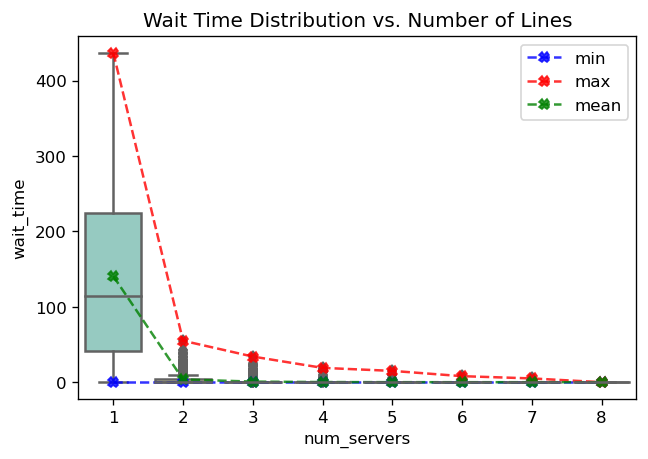

In [308]:
# plot distribution
sns.boxplot(data=df, x="num_servers", y="wait_time", palette="Set3")

# plot mean & extreme values
wait_times = []
for num_servers in server_range:
    target = df[df["num_servers"] == num_servers]["wait_time"]
    wait_times.append(
        np.array([target.min(), target.mean(), target.max()]))
wait_times = np.array(wait_times)
plt.plot(wait_times[:, 0], "bX--", alpha=0.8, label="min")
plt.plot(wait_times[:, 2], "rX--", alpha=0.8, label="max")
plt.plot(wait_times[:, 1], "gX--", alpha=0.8, label="mean")

plt.title("Wait Time Distribution vs. Number of Lines")
plt.legend()
plt.show()

We observe that each distribution of waiting time is heavily *right-skewed with a long tail*: most customers served have a short waiting time or even 0 seconds to wait before checkout; however, a few customers have a disproportionally large waiting time. This phenomenon even tends to be most prominent in queues with many servers more than 1. From a theoretical perspective, each distribution resembles a negative exponential distribution. For these reasons, the mean waiting time overestimates most typical customers but does tremendously underestimate the waiting time of a few max ones, whose waiting time lies far beyond the mean.

Looking across the distributions, we have verified that the waiting time in general, including both the mean value and the max value, decreases as the number of servers/checkout lines increases. Specifically, the maximum wait time decays most rapidly, but there is not as much gain in the mean once it drops close to $0$. We recognize and understand that there is a diminishing return (a decrease in wait time) in response to an increase in the number of servers. In the most extreme case, there is virtually no gain by opening more servers once its number becomes sufficiently large.

#### 2.2.2 Maximal Throughput vs. Number of Servers

Another feature of multi-queueing systems is the increased maximum throughput for having more servers. First, let's understand why this is true from a mathematical perspective by using Little's Law.

Little's Law has many variants in disguise, and you can find them everywhere. Another famous formula other than the original one is called the **Utilization Law**, stating that the utilization is throughput times service time:

$$
    \rho = \lambda S
$$

To extend this to scenarios with multiple servers, we use the following

$$
    \rho = \frac{\lambda S}{M}
$$

We know another formula to calculate utilization, which involves the maximum throughput of a queueing system ($\mu$), or capacity ($C$).

$$
    \rho = \frac{\lambda}{\mu}
$$

We combine the above two equations,

\begin{align*}
    \frac{\lambda S}{M} &= \frac{\lambda}{\mu} \\
    \frac{S}{M} &= \frac{1}{\mu} \\
    C = \mu &= \frac{M}{S}
\end{align*}

This is to say that the maximum throughput (service rate) $\mu$ is inversely proportional to the service time of a single server and directly proportional to the number of servers. When the number of server $M = 1$, then $\mu = C$ and $S$ are just multiplicative inverses to each other.

The expected service time ($E[S]$) for a single server is a constant, so the expected maximum throughput $\mu$, or capacity $C$, of the system solely depends on the number of servers $M$. If we double the number of servers, we double the maximum throughput of the system.

$$
    E[C] = \frac{M}{E[S]}
$$

Let's now verify this relation using our simulator. We will vary the number of servers between 1 and 5. We expect to see the maximum throughput scale accordingly. This part will be similar to **2.1.1**.

*TODO: Run the following code cells; it may take a while.*

In [309]:
# Define data generator
input_seed = 251
data_gen = DataGenerator(input_seed)

# Constant setting
SECOND_PER_MINUTE = 60

########## Simultaion settings ##########

# the unit interval, small value helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = 3600 * 2

MIN_ITEM = 1 # inclusive
MAX_ITEM = 20 # inclusive
MIN_SERVER = 1 # inclusive
MAX_SERVER = 5 # inclusive
MIN_ARRIVAL_RATE = 0.1 # customers per minute, inclusive
PRECISION = 0.1
RANDOM_SEED = 996 # ensure consistent result

# Calculate S_Single
S_Single = 1 / ((MIN_ITEM + MAX_ITEM) / 2 + 7) * 60

In [310]:
# [[num_servers, arrival_rate, wait_time, service_time]]
sim_res = []
max_arrival_rates = []

server_range = range(MIN_SERVER, MAX_SERVER + 1)
for num_servers in server_range:
    
    print("Simulating %d server(s)." % num_servers)
    
    max_arrival_rate = S_Single * num_servers
    max_arrival_rates.append(max_arrival_rate)
    ARRIVAL_RATES = np.arange(
        MIN_ARRIVAL_RATE, max_arrival_rate, PRECISION)

    for arrival_rate in tqdm(ARRIVAL_RATES):
        dist_params = [(
            0, TOTAL_TIMESTAMP, int(
            ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * arrival_rate),
            "uniform", MIN_ITEM, MAX_ITEM
        )] * (TOTAL_TIMESTAMP // ARRIVE_INTERVAL_SECOND)
        initial_events_str = data_gen.generate_time_varying(
            dist_params)
        
        store_config = {
            "cashier": num_servers
        }
        sim = Simulator(store_config, random_state=RANDOM_SEED)
        sim.run(initial_events_str)

        for line in sim.store.lines:
            for customer in line.served:
                wait_time \
                = customer.begin_timestamp - customer.join_timestamp
                service_time \
                = customer.finish_timestamp - customer.begin_timestamp
                sim_res.append([
                    num_servers, arrival_rate, wait_time, service_time])

df = pd.DataFrame(sim_res, columns=[
    "num_servers", "arrival_rate", "wait_time", "service_time"])

Simulating 1 server(s).



Simulating 2 server(s).



Simulating 3 server(s).



Simulating 4 server(s).



Simulating 5 server(s).


*TODO: Plotting may take a while, too.*

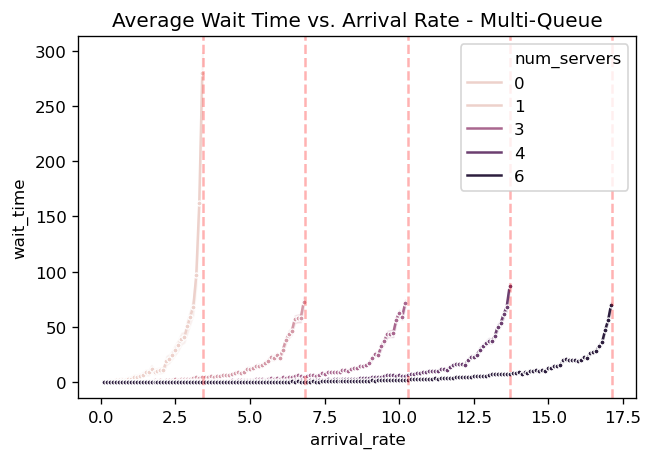

In [311]:
# plot simulation result
ax = sns.lineplot(
    data=df, x="arrival_rate", y="wait_time",
    hue="num_servers", ci=99
)
for line in ax.lines:
    line.set_marker(".")
    
# plot asymptotes
for idx, C in enumerate(max_arrival_rates):
    X, COLOR, ALPHA, LS = C, "red", 0.3, "--"
    plt.axvline(ls=LS, x=X, color=COLOR, alpha=ALPHA)

plt.title("Average Wait Time vs. Arrival Rate - Multi-Queue")
plt.show()

For each given number of servers ($M$), we observe that the wait_time vs. arrival_rate varies similarly to part **2.1.1** and resembles a hockey-shaped curve with an asymptote. More importantly, we can see the asymptotes are equally spaced, suggesting that they are some multiples to the first one where $M = 1$. In other words, the maximum throughput of a queueing system has a direct relationship with the number of servers within, given that the expected service time of each server is the same. This demonstrates that our throughput formula for multi-queue systems is correct.

$$
    E[C] = E[\mu] = \frac{M}{E[S]}
$$

#### 2.2.3 Adaptive Line Scheduling Algorithm

All preceding parts are demo verifications of some basic queueing theory formulas; now it's the time to simulate something more realistic in life. A grocery store in a day experiences "busy hours" when the number of customers that arrive in a unit interval rises sharply: the result is a varying distribution of customer arrivals over time. On Google Map, we found a typical [grocery store](https://www.google.com/maps/place/Publix+Super+Market+at+The+Plaza+Midtown/@33.780065,-84.3896131,17z/data=!3m1!4b1!4m5!3m4!1s0x88f5046789bd327d:0x3702ba8644f6916d!8m2!3d33.780065!4d-84.3874244) (Publix Super Market at The Plaza Midtown, 950 W Peachtree St NW, Atlanta, GA 30309). Google Map also displays a "popular times" chart which is essentially a time-varying distribution of customer arrival rates over a day.

We pick a typical Thursday for this experiment. Below is a screenshot of this time-varying distribution.

<img src="./img/dist.png" alt="Cutstomer Arrival Distribution" width="50%"/>

The distribution has no unit on the y-axis. However, we can assume the dashed line to be 30 customers per minute. It proves to work well with our simulator. We can then create a list of arrival rates accordingly:

*TODO: Run the following code cell to produce a customer arrival schedule, visualize and compare that distribution with the base one above.*

In [322]:
import statistics as st
!pip install -U seaborn
%reload_ext seaborn
import seaborn as sns
sns.__version__

Requirement already up-to-date: seaborn in /Users/jasonqi/opt/anaconda3/lib/python3.6/site-packages (0.11.1)


'0.11.1'

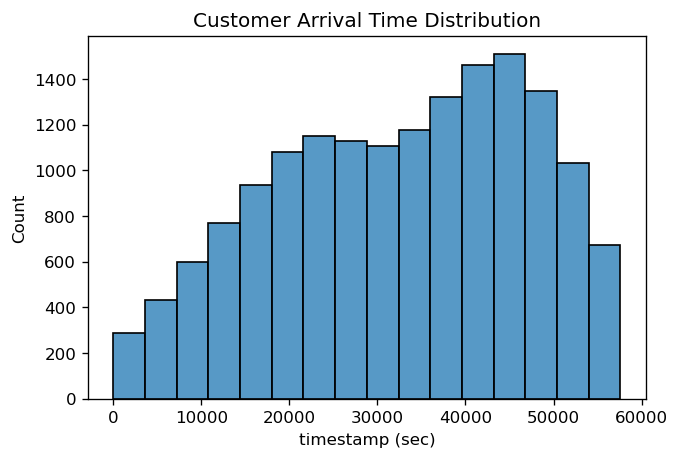

In [2]:
# Constant setting
SECOND_PER_MINUTE = 60
# the unit interval, small value helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# Simulation settings
# You can estimate these number by counting pixels. : )
ARRIVAL_RATES = [
    4.8,            # 6am - 7am
    7.2,            # 7am - 8am
    10. ,           # 8am - 9am
    12.8,           # 9am - 10am
    15.6,           # 10am - 11am
    18. ,           # 11am - 12am
    19.2,           # 12pm - 1pm
    18.8,           # 1pm - 2pm
    18.4,           # 2pm - 3pm
    19.6,           # 3pm - 4pm
    22. ,           # 4pm - 5pm
    24.4,           # 5pm - 6pm
    25.2,           # 6pm - 7pm
    22.4,           # 7pm - 8pm
    17.2,           # 8pm - 9pm
    11.2            # 9pm - 10pm
]

MIN_ITEM = 1 # inclusive
MAX_ITEM = 20 # inclusive

# Define data generator
input_seed = 251
data_gen = DataGenerator(input_seed)

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = ARRIVE_INTERVAL_SECOND * len(ARRIVAL_RATES)

dist_params = []
for idx, rate in enumerate(ARRIVAL_RATES):
    dist_params.append((
        idx * ARRIVE_INTERVAL_SECOND,
        (idx + 1) * ARRIVE_INTERVAL_SECOND,
        int(ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * rate),
        "uniform",
        MIN_ITEM,
        MAX_ITEM))

initial_events_str = data_gen.generate_time_varying(dist_params)
events = create_event_list(initial_events_str, None)

arrival_timestamps = list(map(lambda event: event.timestamp, events))

sns.histplot(arrival_timestamps, binwidth=3600)
plt.xlabel("timestamp (sec)")
plt.title("Customer Arrival Time Distribution")
plt.show()
print()

If we always keep a constant number of checkout lines available, the overall checkout process in a day will not be smooth: when there are too few customers arriving, most lines will be idle, yet when there is a sudden surge of customers rushing to the checkout lines, congestion will be inevitable and long-lasting even though the checkout lines are reaching their max utilization ($\rho$).

We can witness this problem in the following simulation run. But, how do we determine a benchmark value for the number of checkout lines? We will derive it using the overall average customer arrival rate. Based on this rate, we would like to has as many lines as to keep the system utilization ($\rho$) below 0.7. We will do the calculation below.

*TODO: Run the following cells.*

In [23]:
# Experiment Settings
TARGET_UTILIZATION = 0.7
MIN_ITEM = 1
MAX_ITEM = 20
RECORD_INTERVAL = 600
RANDOM_SEED = 996

avg_rate = np.mean(ARRIVAL_RATES)
print("The overall average arrival rate is %.3f customers per minute."
      % avg_rate)

target_throughput = avg_rate / TARGET_UTILIZATION
print(
    ("The target maximum throughput of the system is "
    + "%.3f / %.3f = %.3f customers per minute.")
    % (avg_rate, TARGET_UTILIZATION, target_throughput))

S_Single = 1 / ((MIN_ITEM + MAX_ITEM) / 2 + 7) * 60
print("The throughput of a single server is %.3f customers per minute."
      % S_Single)

NUM_LINES_BASIS = int(np.ceil(target_throughput / S_Single))
print("We should have CEIL(%.3f / %.3f) = %d servers."
      % (target_throughput, S_Single, NUM_LINES_BASIS))

The overall average arrival rate is 16.675 customers per minute.
The target maximum throughput of the system is 16.675 / 0.700 = 23.821 customers per minute.
The throughput of a single server is 3.429 customers per minute.
We should have CEIL(23.821 / 3.429) = 7 servers.


We will then run the simulator on the generated time-varying data with 7 cashier checkout lines. We will record the average waiting time every 600 timestamps (equivalent to 10 minutes) and plot it as a function of simulation time.

We will also produce a plot of **theoretical utilization** ($\rho = \frac{\lambda}{\mu}$) and **observed utilization** across time, the latter obtained by the simulator.

*TODO: Run the code cell below.*

In [24]:
store_config = {
    "cashier": NUM_LINES_BASIS
}

# Run simulation
sim = Simulator(store_config, random_state=RANDOM_SEED)
sim.run(initial_events_str)

In [25]:
# Calculate statistics
mean_times = []
theoretical_utilizations = []
observed_utilizations = []

max_throughput = S_Single * NUM_LINES_BASIS

for idx in range(0, int(TOTAL_TIMESTAMP / RECORD_INTERVAL)):
    start_time = idx * RECORD_INTERVAL
    end_time = (idx + 1) * RECORD_INTERVAL
    (num_customers, _, _, _, mean_time, _) , _ = sim.query_statistics(
        criterion="wait", start_time=start_time, end_time=end_time,
        filter_by="join")
    mean_times.append(mean_time)
    arrival_rate \
    = num_customers / (end_time - start_time) * SECOND_PER_MINUTE
    theoretical_utilizations.append(arrival_rate / max_throughput)
    (num_customers, _, _, _, _, _) , _ = sim.query_statistics(
        criterion="wait", start_time=start_time, end_time=end_time,
        filter_by="finish")
    leave_rate \
    = num_customers / (end_time - start_time) * SECOND_PER_MINUTE
    observed_utilizations.append(leave_rate / max_throughput)

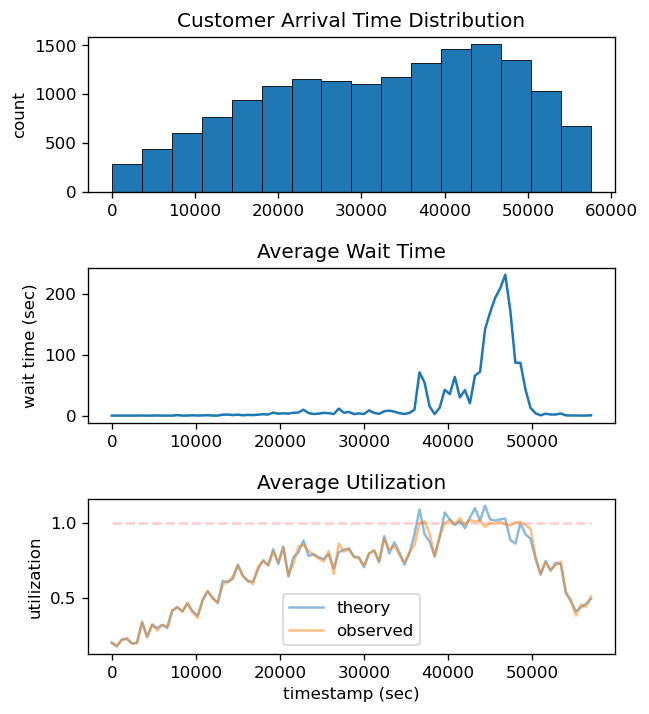

In [26]:
timestamps = np.array(range(
    0, int(TOTAL_TIMESTAMP / RECORD_INTERVAL))) * RECORD_INTERVAL

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
plt.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(5)

ax1.hist(arrival_timestamps, \
         bins=len(ARRIVAL_RATES), edgecolor='black', linewidth=0.5)
ax1.set_ylabel("count")
ax1.set_title("Customer Arrival Time Distribution")

ax2.plot(timestamps, mean_times)
ax2.set_ylabel("wait time (sec)")
ax2.set_title("Average Wait Time")

ax3.plot(timestamps, np.ones(len(timestamps)), "r--", alpha=0.2,)
ax3.plot(
    timestamps, theoretical_utilizations, alpha=0.5, label="theory")
ax3.plot(
    timestamps, observed_utilizations, alpha=0.5, label="observed")
ax3.legend()
ax3.set_xlabel("timestamp (sec)")
ax3.set_ylabel("utilization")
ax3.set_title("Average Utilization")

plt.show()

From the plots above, we observe that the checkout system experiences considerable congestion between timestamps 40000 and 50000, where the average wait time soars around 200 seconds. Meanwhile, Before Timestamp 20000, the queue almost never builds up: this may be a good thing for customers, but it definitely indicates under-utilization of server resources in our system, which may increase the amortized cost of running a grocery store. One thing to notice in the average wait time graph is that once the customer arrival rate starts to decrease near timestamp 45000, the average wait time quickly falls back to the normal range. This demonstrates the beautiful flexibility of queueing systems: they are able to digest the overloaded old requests once the new ones arrive at a slower rate.

Focusing on the utilization curves, we see the average utilization slowly climbs up as customers arrive more and more frequently before timestamp 20000. Afterward, we start to see some congestion (turbulence in the average wait time) when the utilization is around 0.75. Overloaded with even more customers, the theoretical utilization calculated based on customer arrival actually exceeds 1, and as expected the queue becomes unstable. However, the observed utilization, based on the number of customers leaving the checkout line, cannot exceed 1. This explains why the queues later build up rapidly: on average more customers are arriving than they leave.

When the queue is stable, the theoretical throughput and the observed throughput align up very well. On the other hand, when the queue is unstable, the two values go on different routes. Notice the detail that the observed throughput is still near 1 shortly after the customer arrival rate starts to fall. Again, this is a sign to show that the system is digesting old requests that piled up.

*Special Note: in our experiment, the observed throughput can sometimes slightly exceed 1. This is due to the randomness in the number of items purchased per customer, which also affects the checkout service rate.*

**On developing an adaptive checkout line schedule**

As an insight from the above experiment, we need to keep the system utilization within an ideal range to both minimize average wait time and yet keep the utilization reasonably high. There are obvious trade-offs between the two quantities. There is one thing for sure though: we never want to make queues unstable ($\rho >= 1$) because that will lead to severe congestions.

An empirical range is tested: $0.5 < \rho < 0.7$.

To detail how exactly our algorithm works, we will close one checkout line once the system utilization drops below 0.5. Contrarily, a new checkout line will be opened once the utilization rises above 0.7, if there are still remaining ones. To the convenience of our simulator, we will use the observed utilization as the metric for making decisions. We will do a check every 120 timestamps (2 min) by looking into the past 1200 timestamps (20 min), make an immediate decision, and execute it instantaneously, if that decision inovolves opening or closing a line.

Similar to what we did in section **2.1.3**, we will first need to define a custom event to make line open/close decisions: ScheduleLineEvent

*TODO: Run the code cell below to define the custom event subtype.*

In [27]:
# There is no predefined Event subtype for this task.
# We will have to first define such Event ad-hoc: ScheduleLineEvent.
class ScheduleLineEvent(Event):
    """The event to decide if a line needs to be opened or closed.
    
    This is a custom event.
    An OpenLineEvent spawns if system utilization > self.max_util and
    when a line is still available.
    A CloseLineEvent spawns if system utilization < self.min_util and
    there are at least two lines.

    === Attributes ===
    @type timestamp: int
        A timestamp for this event.
    @type max_util: int
        Maximum system utilization.
    @type min_util: int
        Minimum system utilization.
    @type time_back: int
        How much time to go back to calculate utilization.
    @type utilization: float
        Observed utilization rate at self.timestamp.
    @type open_line_count: int
        How many lines are open at self.timestamp.
    """
    
    def __init__(self, timestamp):
        """Initialize an Event with a given timestamp.

        @type self: Event
        @type timestamp: int
            A timestamp for this event.
        @rtype: None
        """
        super().__init__(timestamp, customer=None, line=None)
        self.max_util = MAX_UTIL
        self.min_util = MIN_UTIL
        self.time_back = TIME_BACK
        self.utilization = None
        self.open_line_count = None
    
    def do(self, store):
        """Perform this Event.
        
        @type self: ScheduleLineEvent
        @type store: GroceryStore
        @rtype: list[Event]
            A list of events generated by performing this event.
        """
        
        start_time = max(0, self.timestamp - self.time_back)
        end_time = self.timestamp
        if end_time == 0:
            return []
        
        customer_count = 0
        open_line_count = 0
        for line in store.lines:
            if not line.closed:
                open_line_count += 1
            for customer in line.served:
                customer_timestamp = customer.finish_timestamp
                if start_time <= customer_timestamp < end_time:
                    customer_count += 1
        
        self.open_line_count = open_line_count
        
        leave_rate \
        = customer_count / (end_time - start_time) * SECOND_PER_MINUTE
        max_throughput = S_Single * open_line_count
        utilization = leave_rate / max_throughput
        
        self.utilization = utilization
        
        if utilization > self.max_util:
            for line in store.lines:
                if line.closed:
                    return [LineOpenEvent(self.timestamp, line)]
        elif utilization < self.min_util:
            found_open = False
            for line in store.lines:
                if not line.closed:
                    if found_open:
                        return [LineCloseEvent(self.timestamp, line)]
                    else:
                        found_open = True
                        
        return []

We will need to create sufficient cashier lines for this work, but suppose a grocery store only has 10 checkout lines. We will start with only 1 line, and the algorithm should quickly adapt and ramp-up. We will see some insightful and interesting results later.

*TODO: Run the code cells below.*

In [28]:
MAX_LINE_COUNT = 10
START_LINE_COUNT = 1
START_CHECK_TIME = 0
CHECK_EVERY_TIME = 120
MAX_UTIL = 0.70
MIN_UTIL = 0.50
TIME_BACK = 1200

store_config = {
    "cashier": MAX_LINE_COUNT
}
sim = Simulator(store_config, random_state=RANDOM_SEED)
for line in sim.store.lines[START_LINE_COUNT:]:
    line.close()
schedule_line_events = []
for timestamp in range(
    START_CHECK_TIME, TOTAL_TIMESTAMP, CHECK_EVERY_TIME):
    schedule_line_event = ScheduleLineEvent(timestamp)
    schedule_line_events.append(schedule_line_event)
    sim.events.put(schedule_line_event)

# Run simulation
sim.run(initial_events_str)

In [29]:
# Calculate statistics
mean_times = []
utilizations = []
servers = []

for idx in range(0, int(TOTAL_TIMESTAMP / RECORD_INTERVAL)):
    start_time = idx * RECORD_INTERVAL
    end_time = (idx + 1) * RECORD_INTERVAL
    (num_customers, _, _, _, mean_time, _) , _ = sim.query_statistics(
        criterion="wait", start_time=start_time, end_time=end_time, filter_by="join")
    mean_times.append(mean_time)

for schedule_line_event in schedule_line_events:
    utilizations.append(schedule_line_event.utilization)
    servers.append(schedule_line_event.open_line_count)

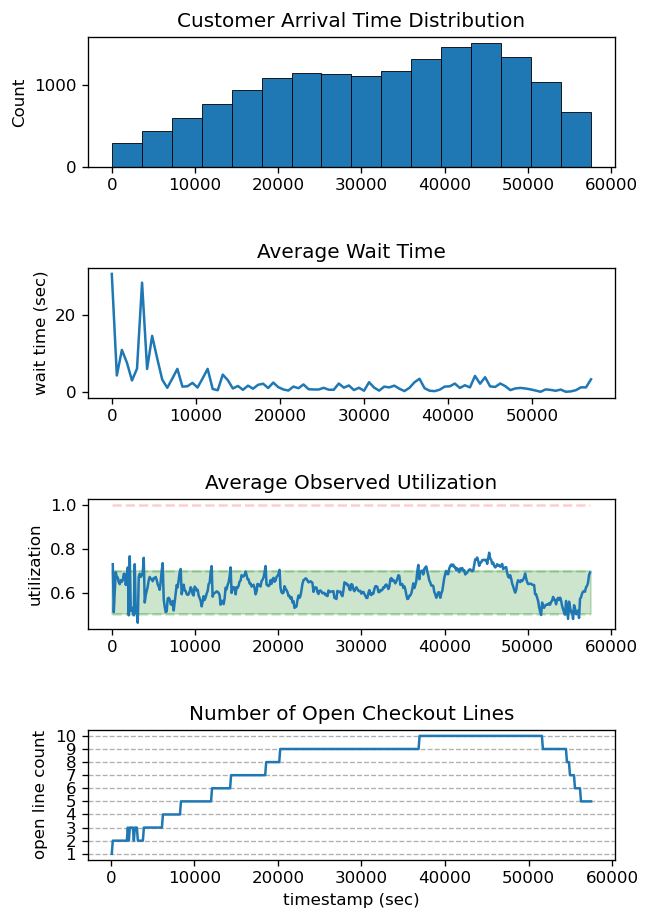

In [30]:
timestamps = np.array(range(
    0, int(TOTAL_TIMESTAMP / RECORD_INTERVAL))) * RECORD_INTERVAL

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
plt.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(5)

ax1.hist(arrival_timestamps, bins=len(ARRIVAL_RATES),
         edgecolor='black', linewidth=0.5)
ax1.set_ylabel("Count")
ax1.set_title("Customer Arrival Time Distribution")

ax2.plot(timestamps, mean_times)
ax2.set_ylabel("wait time (sec)")
ax2.set_title("Average Wait Time")

timestamps = np.array(range(
    0, int(TOTAL_TIMESTAMP / CHECK_EVERY_TIME))) * CHECK_EVERY_TIME

ax3.plot(timestamps, np.ones(len(timestamps)), "r--", alpha=0.2,)
ax3.plot(
    timestamps, np.ones(len(timestamps)) * MAX_UTIL, "g--", alpha=0.2,)
ax3.plot(
    timestamps, np.ones(len(timestamps)) * MIN_UTIL, "g--", alpha=0.2,)
rect = matplotlib.patches.Rectangle(
    (0, MIN_UTIL), TOTAL_TIMESTAMP, MAX_UTIL-MIN_UTIL, color='green',
    alpha=0.2)
ax3.add_patch(rect)
ax3.plot(timestamps, utilizations)
ax3.set_ylabel("utilization")
ax3.set_title("Average Observed Utilization")

ax4.plot(timestamps, servers)
ax4.set_xlabel("timestamp (sec)")
ax4.set_ylabel("open line count")
ax4.set_title("Number of Open Checkout Lines")
ax4.yaxis.set_major_locator(MaxNLocator(integer=True))
ax4.yaxis.grid(True, linestyle='--')

plt.show()

In contrast to the scene with a constant number of checkout lines, having this adaptive line scheduling algorithm yields a much smaller average wait time for the entire simulation duration. There is a spike for the wait time near the start of the simulation while the algorithm ramps up, resulting in an oscillatory wait time up to 30 seconds, but it soon falls down into the acceptable range and slightly bounces between 0 and 5 seconds thereafter.

The observed utilization is very smooth compared with the scenario without control. During most moments, the utilization lies within the target utilization range. There is one exception near timestamp 45000, where it slightly exceeds our defined upper bound. This is due to the input constraint that we only have up to 10 checkout lines, but the customers are arriving at a rate that our system cannot handle well even by opening all of them.

We also see the number of open checkout lines change according to the time-varying distribution of customer arrivals; in other words, they have roughly the same shape. In fact, only by varying the number of checkout lines can we maintain a relatively stable utilization between 0.5 and 0.7 and make the system never experience any congestion ($\rho \geq 1$). We have demonstrated that a simple heuristic as stated above can do this job very well.

This line open/close scheme is not perfect. We observe that the system rapidly switched between having 2 and 3 lines near timestamp 3000. This oscillatory behavior is not practical in real life and prone to instability in the system. It may also explain why the average wait time is unpredictable near that time range. A more sophisticated scheme may alleviate this situation.

### 2.3 Checkout Modification

#### 2.3.1 Checkout Line Types

In this part, we will do a comparison experimentation on the queueing system with multiple servers. Specially, in the first senario, we set the number of cashier checkout lines as the independent variable varying from 1 to 8 and we set the number of express checkout lines and self checkout lines as 1 respectively for fixed variable. In the second case, we set the number of express checkout lines as the independent variable varying from 1 to 8 and we set the number of cashier checkout lines and self checkout lines as 1 respectively for fixed variable. Finally, in the third case, we set the number of express checkout lines as the independent variable varying from 1 to 8 and we set the number of cashier checkout lines and express checkout lines as 1 respectively for fixed variable. We will explore the relationship between the increase in the number of a certain type of checkout line (server) and waiting time. Run the following code to display the graphs for comparison.

In [10]:
Utility.get_checkout_time = Utility.get_checkout_time_deterministic
Utility.pick_checkout_line = Utility.pick_checkout_line_least_person

# Define data generator
input_seed = 251
sim_seed = 996
data_gen = DataGenerator(input_seed)

# Constant setting
SECOND_PER_MINUTE = 60

########## Simultaion settings ##########

# the unit interval, small value helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = 3600 * 6
MIN_ITEM = 1
MAX_ITEM = 10
MIN_SERVER = 1 # inclusive
MAX_SERVER = 8 # inclusive
ARRIVAL_RATE = 3.3 # customers per minute, inclusive
RANDOM_SEED = 996 # ensure same result across run

# Generate arrival data; this will be fixed across all runs
dist_params = [(
    0, TOTAL_TIMESTAMP,
    int(ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * ARRIVAL_RATE),
    "uniform", MIN_ITEM, MAX_ITEM
)] * (TOTAL_TIMESTAMP // ARRIVE_INTERVAL_SECOND)
initial_events_str = data_gen.generate_time_varying(dist_params)

In [11]:
# simulation result: [[num_server, wait_time, service_time]]
sim_res = []

server_range = range(MIN_SERVER, MAX_SERVER + 1)
for num_servers in server_range:
    store_config = {
        "cashier": num_servers,
        "express": 1,
        "self": 1
    }
    sim = Simulator(store_config, random_state=sim_seed)
    sim.run(initial_events_str)

    for line in sim.store.lines:
        for customer in line.served:
            wait_time \
            = customer.begin_timestamp - customer.join_timestamp
            service_time \
            = customer.finish_timestamp - customer.begin_timestamp
            sim_res.append([num_servers, wait_time, service_time])

df = pd.DataFrame(
    sim_res, columns=["num_servers", "wait_time", "service_time"])

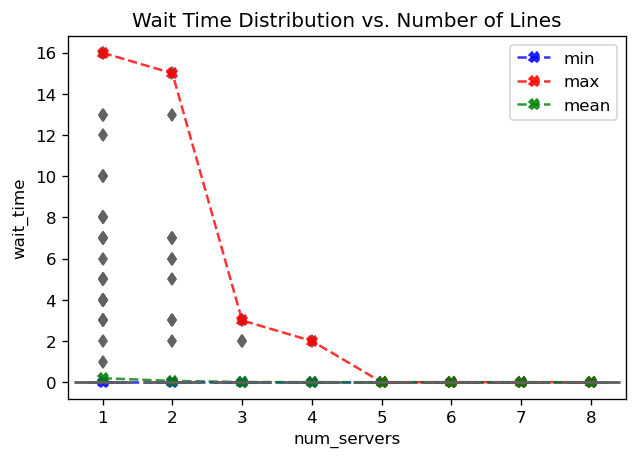

In [12]:
# plot distribution
sns.boxplot(data=df, x="num_servers", y="wait_time", palette="Set3")

# plot mean & extreme values
wait_times = []
for num_servers in server_range:
    target = df[df["num_servers"] == num_servers]["wait_time"]
    wait_times.append(
        np.array([target.min(), target.mean(), target.max()]))
wait_times = np.array(wait_times)
plt.plot(wait_times[:, 0], "bX--", alpha=0.8, label="min")
plt.plot(wait_times[:, 2], "rX--", alpha=0.8, label="max")
plt.plot(wait_times[:, 1], "gX--", alpha=0.8, label="mean")

plt.title("Wait Time Distribution vs. Number of Lines")
plt.legend()
plt.show()

In [13]:
# simulation result: [[num_server, wait_time, service_time]]
sim_res = []

server_range = range(MIN_SERVER, MAX_SERVER + 1)
for num_servers in server_range:
    store_config = {
        "cashier": 1,
        "express": num_servers,
        "self": 1
    }
    sim = Simulator(store_config, random_state=sim_seed)
    sim.run(initial_events_str)

    for line in sim.store.lines:
        for customer in line.served:
            wait_time \
            = customer.begin_timestamp - customer.join_timestamp
            service_time \
            = customer.finish_timestamp - customer.begin_timestamp
            sim_res.append([num_servers, wait_time, service_time])

df = pd.DataFrame(
    sim_res, columns=["num_servers", "wait_time", "service_time"])

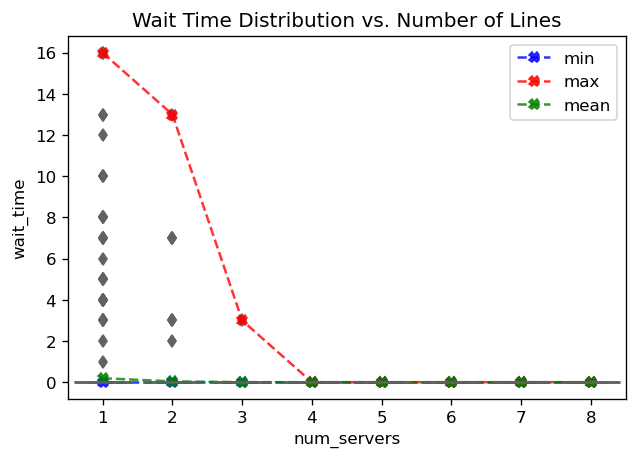

In [14]:
# plot distribution
sns.boxplot(data=df, x="num_servers", y="wait_time", palette="Set3")

# plot mean & extreme values
wait_times = []
for num_servers in server_range:
    target = df[df["num_servers"] == num_servers]["wait_time"]
    wait_times.append(
        np.array([target.min(), target.mean(), target.max()]))
wait_times = np.array(wait_times)
plt.plot(wait_times[:, 0], "bX--", alpha=0.8, label="min")
plt.plot(wait_times[:, 2], "rX--", alpha=0.8, label="max")
plt.plot(wait_times[:, 1], "gX--", alpha=0.8, label="mean")

plt.title("Wait Time Distribution vs. Number of Lines")
plt.legend()
plt.show()

In [15]:
# simulation result: [[num_server, wait_time, service_time]]
sim_res = []

server_range = range(MIN_SERVER, MAX_SERVER + 1)
for num_servers in server_range:
    store_config = {
        "cashier": 1,
        "express": 1,
        "self": num_servers
    }
    sim = Simulator(store_config, random_state=sim_seed)
    sim.run(initial_events_str)

    for line in sim.store.lines:
        for customer in line.served:
            wait_time \
            = customer.begin_timestamp - customer.join_timestamp
            service_time \
            = customer.finish_timestamp - customer.begin_timestamp
            sim_res.append([num_servers, wait_time, service_time])

df = pd.DataFrame(
    sim_res, columns=["num_servers", "wait_time", "service_time"])

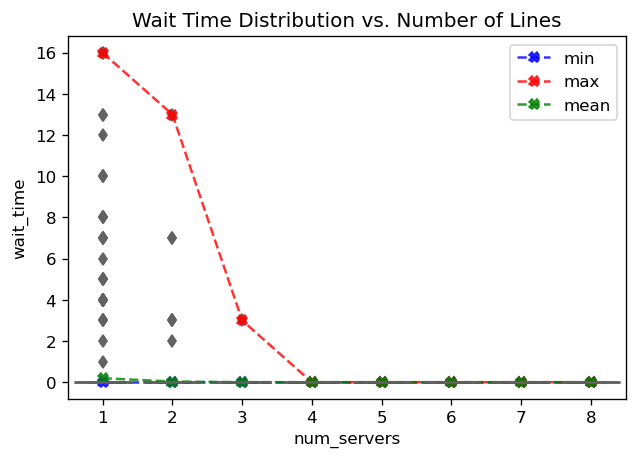

In [16]:
# plot distribution
sns.boxplot(data=df, x="num_servers", y="wait_time", palette="Set3")

# plot mean & extreme values
wait_times = []
for num_servers in server_range:
    target = df[df["num_servers"] == num_servers]["wait_time"]
    wait_times.append(
        np.array([target.min(), target.mean(), target.max()]))
wait_times = np.array(wait_times)
plt.plot(wait_times[:, 0], "bX--", alpha=0.8, label="min")
plt.plot(wait_times[:, 2], "rX--", alpha=0.8, label="max")
plt.plot(wait_times[:, 1], "gX--", alpha=0.8, label="mean")

plt.title("Wait Time Distribution vs. Number of Lines")
plt.legend()
plt.show()

In [17]:
#=======================================================================#

We will compare a single express checkout line and a single express checkout line. Schimmel (2013) studied the effects of checkouts. We will find the relationship between the average queue length and arrival rate in these two senarios.

In [18]:
# There is no predefined Event subtype to count number of customers in
# a checkout line. We will have to first define such Event ad-hoc:
# CountQueueLengthEvent.

class CountQueueLengthEvent(Event):
    """The event to count the length of queues for all checkout lines.
    
    This is a custom event. No new event will be spawned after it.
    It will save its result (a list of queue lengths) after execution.

    === Attributes ===
    @type timestamp: int
        A timestamp for this event.
    @type lengths: list[int]
        Number of customers in each checkout line.
    @type closed: list[bool]
        If each checkout line is closed
    """
    
    def __init__(self, timestamp):
        """Initialize an Event with a given timestamp.

        @type self: Event
        @type timestamp: int
            A timestamp for this event.
        @rtype: None
        """
        super().__init__(timestamp, customer=None, line=None)
        self.lengths = None
        self.closed = None
        
    
    def do(self, store):
        """Perform this Event.
        
        Count customers in queues.
        
        @type self: CountQueueLengthEvent
        @type store: GroceryStore
        @rtype: list[Event]
            A list of events generated by performing this event.
        """
        self.lengths = []
        self.closed = []
        for line in store.lines:
            self.lengths.append(line.get_num_customers())
            self.closed.append(line.closed)
        return []

In [19]:
# Define store configuration: store has only 1 cashier line.
store_config = {
    "express": 1
}

# Define data generator
input_seed = 251
sim_seed = None # no need for single queue
data_gen = DataGenerator(input_seed)

# Constant setting
SECOND_PER_MINUTE = 60

########## Simultaion settings ##########

# the unit interval, small value helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = 3600 * 2

COUNT_STEP = 10 # how often to count queue lengths, in seconds
MIN_ITEM = 1
MAX_ITEM = 10
MIN_ARRIVAL_RATE = 0.1 # customers per minute, inclusive
MAX_ARRIVAL_RATE = 3.5 # customers per minute, exclusive
PRECISION = 0.1

In [20]:
# simulation result: [[arrival_rate, avg_wait_time, avg_queue_length]]
ARRIVAL_RATES = np.arange(
    MIN_ARRIVAL_RATE, MAX_ARRIVAL_RATE, PRECISION)
sim_res = []
service_times = []

for arrival_rate in ARRIVAL_RATES:
    dist_params = [(
        0, TOTAL_TIMESTAMP,
        int(ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * arrival_rate),
        "uniform", MIN_ITEM, MAX_ITEM
    )] * (TOTAL_TIMESTAMP // ARRIVE_INTERVAL_SECOND)
    initial_events_str = data_gen.generate_time_varying(dist_params)

    sim = Simulator(store_config, random_state=sim_seed)
    
    # Add the custom events to count queue lengths here
    count_events = []
    for timestamp in range(0, TOTAL_TIMESTAMP+1, COUNT_STEP):
        count_event = CountQueueLengthEvent(timestamp)
        count_events.append(count_event)
        sim.events.put(count_event)
    
    sim.run(initial_events_str)
    
    trial_res = []
    for line in sim.store.lines:
        for customer in line.served:
            total_time \
            = customer.finish_timestamp - customer.join_timestamp
            service_times.append(
                customer.finish_timestamp - customer.begin_timestamp)
            trial_res.append([total_time])
    trial_res = np.array(trial_res)
    
    total_waiting = 0
    for count_event in count_events:
        total_waiting += np.sum(count_event.lengths)
    
    sim_res.append([
        arrival_rate,
        trial_res[:, 0].mean(),
        total_waiting / len(count_events)
    ])



df_0 = pd.DataFrame(
    sim_res, columns=[
        "arrival_rate", "avg_total_time", "avg_queue_length"])

In [21]:
# Define store configuration: store has only 1 cashier line.
store_config = {
    "cashier": 1
}

# Define data generator
input_seed = 251
sim_seed = None # no need for single queue
data_gen = DataGenerator(input_seed)

# Constant setting
SECOND_PER_MINUTE = 60

########## Simultaion settings ##########

# the unit interval, small value helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = 3600 * 2

COUNT_STEP = 10 # how often to count queue lengths, in seconds
MIN_ITEM = 1
MAX_ITEM = 10
MIN_ARRIVAL_RATE = 0.1 # customers per minute, inclusive
MAX_ARRIVAL_RATE = 3.5 # customers per minute, exclusive
PRECISION = 0.1

In [22]:
# simulation result: [[arrival_rate, avg_wait_time, avg_queue_length]]
ARRIVAL_RATES = np.arange(
    MIN_ARRIVAL_RATE, MAX_ARRIVAL_RATE, PRECISION)
sim_res = []
service_times = []

for arrival_rate in ARRIVAL_RATES:
    dist_params = [(
        0, TOTAL_TIMESTAMP,
        int(ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * arrival_rate),
        "uniform", MIN_ITEM, MAX_ITEM
    )] * (TOTAL_TIMESTAMP // ARRIVE_INTERVAL_SECOND)
    initial_events_str = data_gen.generate_time_varying(dist_params)

    sim = Simulator(store_config, random_state=sim_seed)
    
    # Add the custom events to count queue lengths here
    count_events = []
    for timestamp in range(0, TOTAL_TIMESTAMP+1, COUNT_STEP):
        count_event = CountQueueLengthEvent(timestamp)
        count_events.append(count_event)
        sim.events.put(count_event)
    
    sim.run(initial_events_str)
    
    trial_res = []
    for line in sim.store.lines:
        for customer in line.served:
            total_time \
            = customer.finish_timestamp - customer.join_timestamp
            service_times.append(
                customer.finish_timestamp - customer.begin_timestamp)
            trial_res.append([total_time])
    trial_res = np.array(trial_res)
    
    total_waiting = 0
    for count_event in count_events:
        total_waiting += np.sum(count_event.lengths)
    
    sim_res.append([
        arrival_rate,
        trial_res[:, 0].mean(),
        total_waiting / len(count_events)
    ])



df_1 = pd.DataFrame(
    sim_res, columns=[
        "arrival_rate", "avg_total_time", "avg_queue_length"])

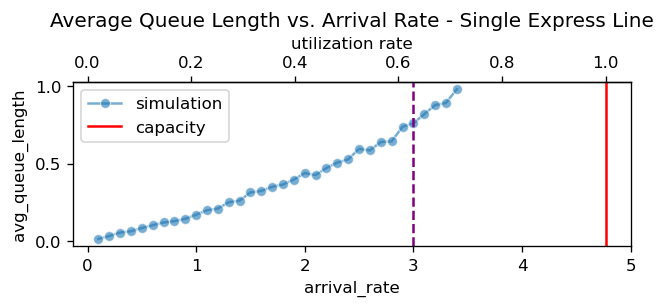

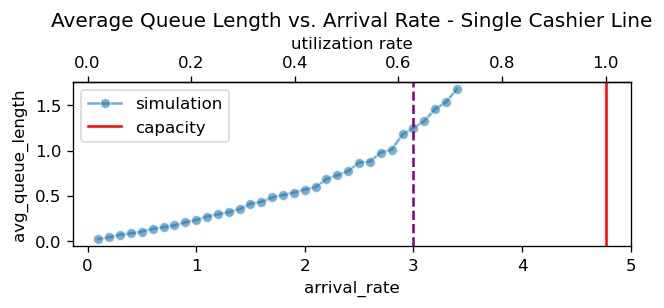

In [23]:
S = np.mean(service_times)
C = 1 / S * SECOND_PER_MINUTE

plt.subplot(2,1,1)
# simulation
ax = sns.lineplot(data=df_0, x="arrival_rate", y="avg_queue_length",
                  label="simulation", alpha=0.6, marker="o")
# plot asymptote
plt.axvline(x=C, color="red", label="capacity")

# add secondary x-axis: utilization rate
secax = ax.secondary_xaxis(
    'top', functions=(lambda x: x / C, lambda x: x * C))
secax.set_xlabel('utilization rate')

# highlight a point
plt.axvline(x=3, color="purple", linestyle ="--")

plt.title("Average Queue Length vs. Arrival Rate - Single Express Line")
plt.legend()
plt.show()

plt.subplot(2,1,2)
# simulation
ax = sns.lineplot(data=df_1, x="arrival_rate", y="avg_queue_length",
                  label="simulation", alpha=0.6, marker="o")
# plot asymptote
plt.axvline(x=C, color="red", label="capacity")

# add secondary x-axis: utilization rate
secax = ax.secondary_xaxis(
    'top', functions=(lambda x: x / C, lambda x: x * C))
secax.set_xlabel('utilization rate')

# highlight a point
plt.axvline(x=3, color="purple", linestyle ="--")

plt.title("Average Queue Length vs. Arrival Rate - Single Cashier Line")
plt.legend()
plt.show()

As marked with the purple dashed line at arrival rate of 3, we could compare the average queue length for the single cashier line case and the single express line case. It is shown that the average queue length for the express line is below 1.0 around 0.75 but the average queue length for the cashier line is above 1.0 around 1.25.

#### 2.3.2 Line Selection Heuristics

We are also interested in how different heuristics may affect the distribution of waiting time for customers. To reiterate a bit, we have 5 different types of line selection heuristics:
- **Pure Random**
    - The customer randomly selects an available line and goes for it.
- **Least Person**
    - The customer selects the line with the least number of people waiting in that line.
- **Least Item**
    - The customer selects the line with the least number of items held by the people waiting in that line..
- **Least Time**
    - The customer selects the line with the least *expected* queueing time determined by customers waiting ahead.
- **Round-Robin**
    - Each checkout line takes turns to accept new customers.
    
As stated previously, we believe that the least person heuristic is closest to the reality. Although there certainly are people who select lines purely randomly, we believe most of grocery customers will actively select the least time consuming line according to their observation. However, in terms of our simulation goal, the pure random heuristic is a meaniful baseline for other heuristics.

The least item and least time heuristics are probably more efficient than the least person heuristic because they are more precise measurements of the expected waiting time. Although they are not impossible for customers to adopt, it is rather difficult to count the number of items in the line ahead of you as a shopper, not to mention estimating the waiting time based on the number of items. Thus, the two heuristics here serve as a rather optimal solution to the problem so that we are able to see if the least person heuristic perform as closely well as the optimal solution. 

On another perspective, we are also interested if the waiting time of customers may improve with regulations provided by the grocery store. That is why we included Round-Robin in our line selection heuristics, because checkout lines taking turns to accept new customers may be easily adopted by grocery stores, and we are interested in if Round-Robin can perform better than the least person heuristic.

To make comparison of the waiting time, we will choose the min, median, and max arrival rates in the Publix, and for each arrival rate, we will make plots of the customer waiting time versus number of servers for each of the 5 heuristics given different arrival rates. The three arrival rates we chose are 25.2, 16.675, 4.8, which are the max, mean, and min arrival rate in the list of arrival rates we got from Google Map.

In [3]:
# simulation result: [[num_server, wait_time, service_time]]
def sim_result():
    sim_res = []

    server_range = range(MIN_SERVER, MAX_SERVER + 1)
    for num_servers in server_range:
        store_config = {
            "cashier": num_servers
        }
        sim = Simulator(store_config, random_state=sim_seed)
        sim.run(initial_events_str)

        for line in sim.store.lines:
            for customer in line.served:
                wait_time \
                = customer.begin_timestamp - customer.join_timestamp
                service_time \
                = customer.finish_timestamp - customer.begin_timestamp
                sim_res.append([num_servers, wait_time, service_time])

    df = pd.DataFrame(
        sim_res, columns=["num_servers", "wait_time", "service_time"])
    return df

In [4]:
def sub_plotting(axis, x, y, title):
    pllt = axis[x][y]
    df = sim_result()
    # plot distribution
    sns.boxplot(ax = pllt, data=df, x="num_servers", y="wait_time", palette="Set3")#.set(xlabel=None, ylabel=None)

    # plot mean & extreme values
    wait_times = []
    for num_servers in server_range:
        target = df[df["num_servers"] == num_servers]["wait_time"]
        wait_times.append(
            np.array([target.min(), target.mean(), target.max()]))
    wait_times = np.array(wait_times)
    pllt.plot(wait_times[:, 0], "bX--", alpha=0.8, label="min")
    pllt.plot(wait_times[:, 2], "rX--", alpha=0.8, label="max")
    pllt.plot(wait_times[:, 1], "gX--", alpha=0.8, label="mean")

    pllt.set_title(title)
    pllt.legend()
    return wait_times

In [5]:
# Define data generator
input_seed = 251
data_gen = DataGenerator(input_seed)

# Constant setting
SECOND_PER_MINUTE = 60

########## Simultaion settings ##########

# the unit interval, small value helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = 3600 * 6
MIN_ITEM = 1
MAX_ITEM = 20
MIN_SERVER = 1 # inclusive
MAX_SERVER = 8 # inclusive
ARRIVAL_RATE = 25.2 # customers per minute, inclusive
RANDOM_SEED = 996 # ensure same result across run

# Generate arrival data; this will be fixed across all runs
dist_params = [(
    0, TOTAL_TIMESTAMP,
    int(ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * ARRIVAL_RATE),
    "uniform", MIN_ITEM, MAX_ITEM
)] * (TOTAL_TIMESTAMP // ARRIVE_INTERVAL_SECOND)
initial_events_str = data_gen.generate_time_varying(dist_params)

Text(0.5, 0.98, 'Waiting Time v.s. Number of Servers for Different Line Selection Heuristics at 25.2 Arrival Rate')

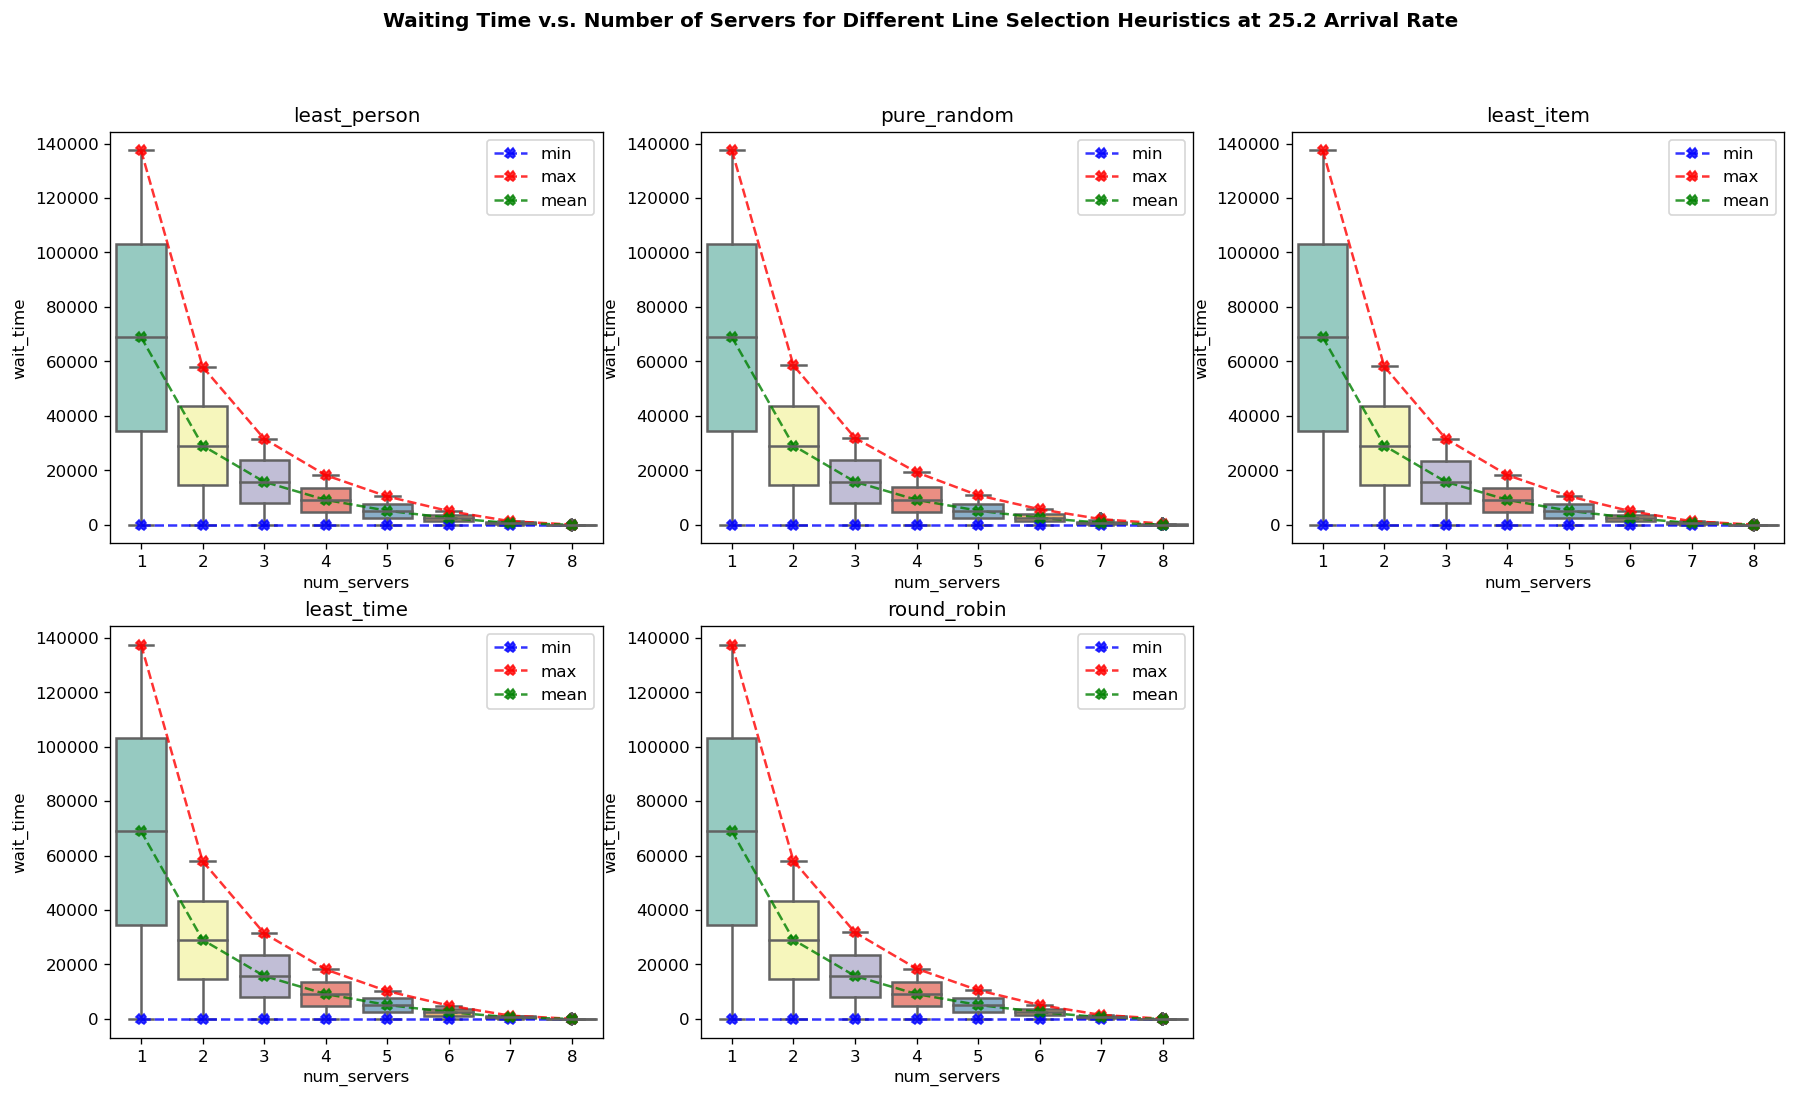

In [207]:
#plotting the performance of each heuristic with respect to number of servers 
#when ARRIVAL_RATE = 25.2
fig, axis = plt.subplots(2, 3, figsize=(18, 10))
Utility.pick_checkout_line = Utility.pick_checkout_line_least_person
wt_least_person = sub_plotting(axis, 0, 0, "least_person")
Utility.pick_checkout_line = Utility.pick_checkout_line_pure_random
wt_pure_random = sub_plotting(axis, 0, 1, "pure_random")
Utility.pick_checkout_line = Utility.pick_checkout_line_least_item
wt_least_item = sub_plotting(axis, 0, 2, "least_item")
Utility.pick_checkout_line = Utility.pick_checkout_line_least_time
wt_least_time = sub_plotting(axis, 1, 0, "least_time")
Utility.pick_checkout_line = Utility.pick_checkout_line_round_robin
wt_round_robin = sub_plotting(axis, 1, 1, "round_robin")
axis[-1][-1].axis('off')
wt = {"least_person": wt_least_person, 
      "pure_random": wt_pure_random, 
      "least_item": wt_least_item, 
      "least_time": wt_least_time, 
      "round_robin": wt_round_robin}
fig.suptitle('Waiting Time v.s. Number of Servers for Different Line Selection Heuristics at 25.2 Arrival Rate',fontweight ="bold")

Text(0.5, 0.98, 'Difference of Max Waiting Time v.s. Number of Servers between least person and other heuristics at 25.2 Arrival Rate')

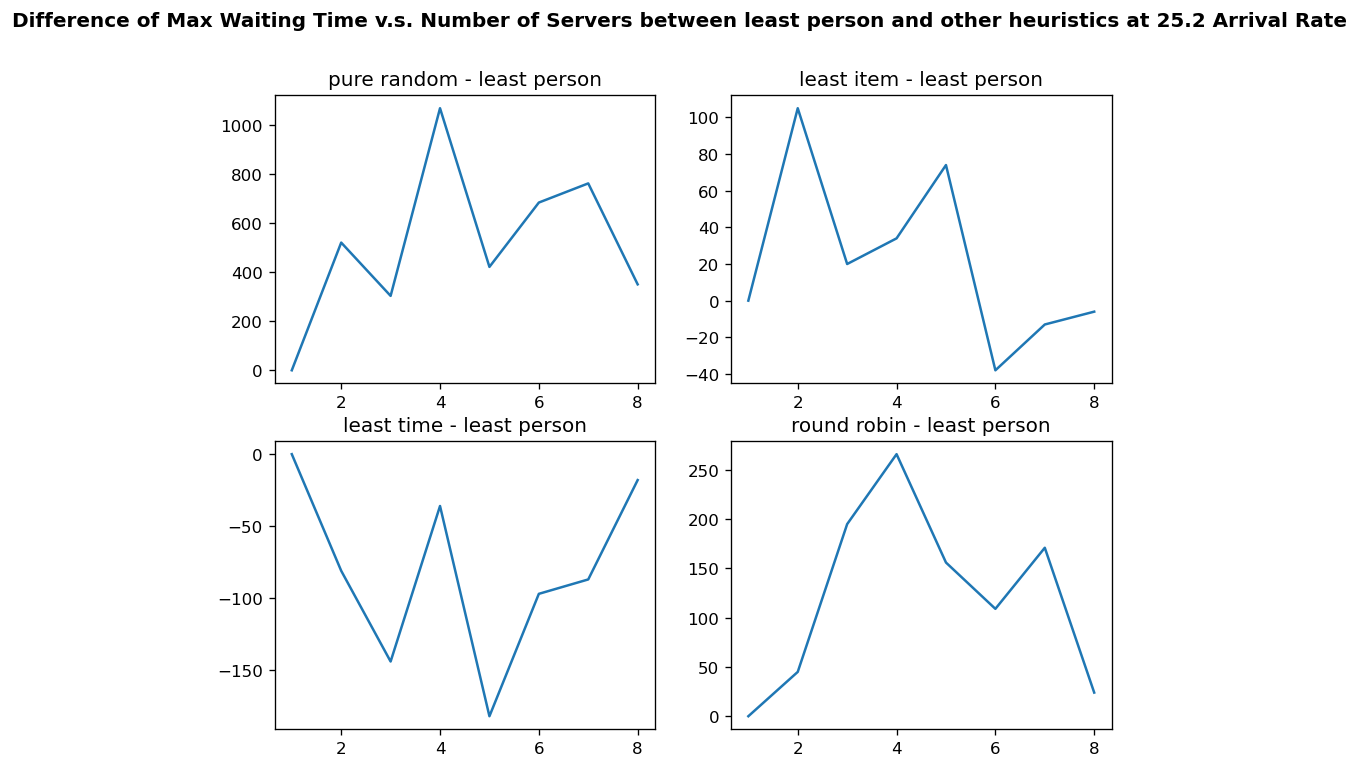

In [208]:
fig, axis = plt.subplots(2, 2, figsize=(9, 7))
axis[0][0].set_title("pure random - least person")
axis[0][0].plot(range(1,9), wt_pure_random[:, 2] - wt_least_person[:, 2])
axis[0][1].set_title("least item - least person")
axis[0][1].plot(range(1,9), wt_least_item[:, 2] - wt_least_person[:, 2])
axis[1][0].set_title("least time - least person")
axis[1][0].plot(range(1,9), wt_least_time[:, 2] - wt_least_person[:, 2])
axis[1][1].set_title("round robin - least person")
axis[1][1].plot(range(1,9), wt_round_robin[:, 2] - wt_least_person[:, 2])
fig.suptitle('Difference of Max Waiting Time v.s. Number of Servers between least person and other heuristics at 25.2 Arrival Rate',fontweight ="bold")

Text(0.5, 0.98, 'Difference of Mean Waiting Time v.s. Number of Servers between least person and other heuristics at 25.2 Arrival Rate')

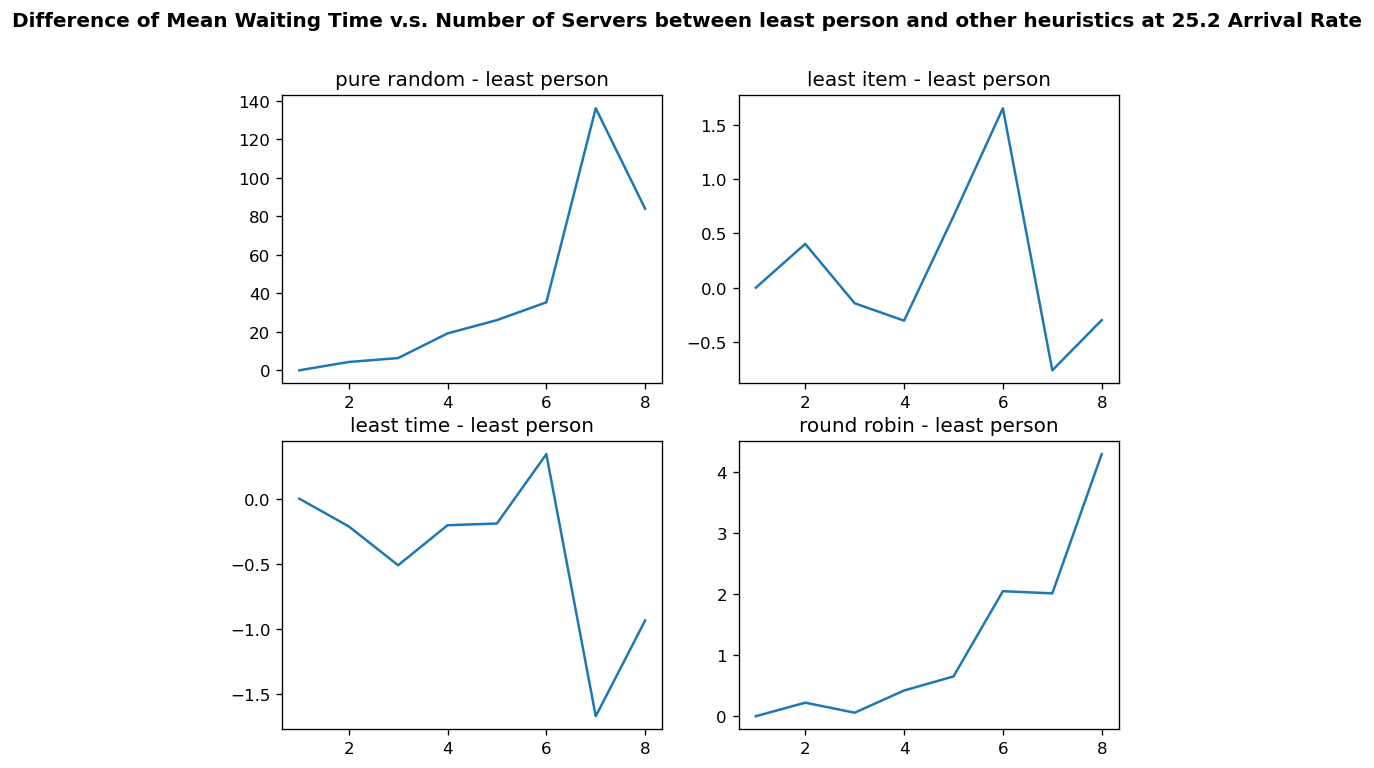

In [209]:
fig, axis = plt.subplots(2, 2, figsize=(9, 7))
axis[0][0].set_title("pure random - least person")
axis[0][0].plot(range(1,9), wt_pure_random[:, 1] - wt_least_person[:, 1])
axis[0][1].set_title("least item - least person")
axis[0][1].plot(range(1,9), wt_least_item[:, 1] - wt_least_person[:, 1])
axis[1][0].set_title("least time - least person")
axis[1][0].plot(range(1,9), wt_least_time[:, 1] - wt_least_person[:, 1])
axis[1][1].set_title("round robin - least person")
axis[1][1].plot(range(1,9), wt_round_robin[:, 1] - wt_least_person[:, 1])
fig.suptitle('Difference of Mean Waiting Time v.s. Number of Servers between least person and other heuristics at 25.2 Arrival Rate',fontweight ="bold")

As we can see here, when the arrival rate equals the maximum arrival rate in the Publix, there are no significant difference between each of the selection heuristics. This result is unexpected but reasonable, because when there are a large amount of people arriving, the most determining factor for the efficiency of the system will be the number of servers instead of the line selection methods. 

However, by taking the difference of the max waiting time between other heuristics and the least person heuristic, we may see that the pure random heuristic adds to the waiting time significantly upto 1000 seconds (about 17 minutes). The least item heuristic performs worse than least person when there are fewer servers, but it performs better than least person with more servers. The least time heuristic does not significantly better than the least person heuristic in terms of the max waiting time. The round robin heuristic performs worse than least person, which means regulatory intervention in the queue process may not improve the efficiency. 

In terms of the difference of mean waiting times, we can observe that the least person heuristic performs much better than the pure random one, while other heuristics do not have a significant difference with the least person heuristic.

In [210]:
# Define data generator
input_seed = 251
data_gen = DataGenerator(input_seed)

# Constant setting
SECOND_PER_MINUTE = 60

########## Simultaion settings ##########

# the unit interval, small value helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = 3600 * 6
MIN_ITEM = 1
MAX_ITEM = 20
MIN_SERVER = 1 # inclusive
MAX_SERVER = 8 # inclusive
ARRIVAL_RATE = 16.675 # customers per minute, inclusive
RANDOM_SEED = 996 # ensure same result across run

# Generate arrival data; this will be fixed across all runs
dist_params = [(
    0, TOTAL_TIMESTAMP,
    int(ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * ARRIVAL_RATE),
    "uniform", MIN_ITEM, MAX_ITEM
)] * (TOTAL_TIMESTAMP // ARRIVE_INTERVAL_SECOND)
initial_events_str = data_gen.generate_time_varying(dist_params)

Text(0.5, 0.98, 'Waiting Time v.s. Number of Servers for Different Line Selection Heuristics at 16.675 Arrival Rate')

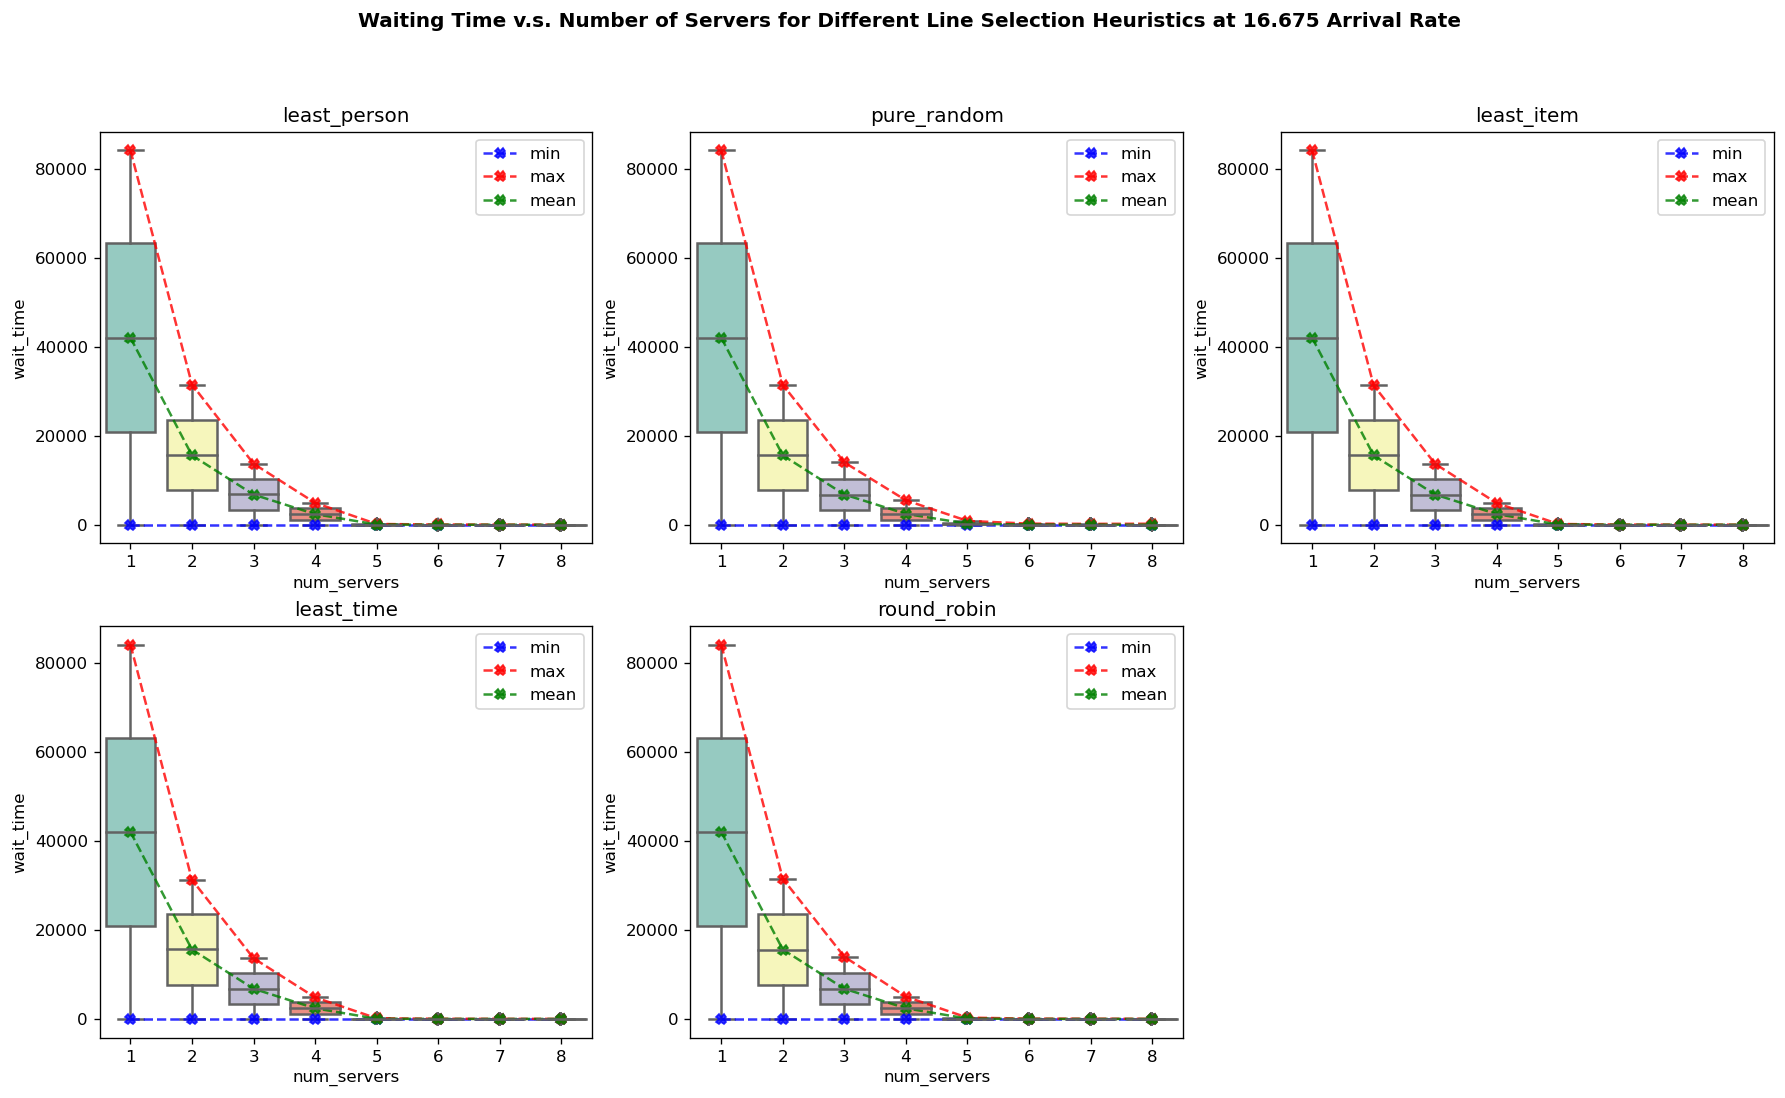

In [211]:
#ARRIVAL_RATE = 16.675
fig, axis = plt.subplots(2, 3, figsize=(18, 10))
Utility.pick_checkout_line = Utility.pick_checkout_line_least_person
wt_least_person = sub_plotting(axis, 0, 0, "least_person")
Utility.pick_checkout_line = Utility.pick_checkout_line_pure_random
wt_pure_random = sub_plotting(axis, 0, 1, "pure_random")
Utility.pick_checkout_line = Utility.pick_checkout_line_least_item
wt_least_item = sub_plotting(axis, 0, 2, "least_item")
Utility.pick_checkout_line = Utility.pick_checkout_line_least_time
wt_least_time = sub_plotting(axis, 1, 0, "least_time")
Utility.pick_checkout_line = Utility.pick_checkout_line_round_robin
wt_round_robin = sub_plotting(axis, 1, 1, "round_robin")
axis[-1][-1].axis('off')
wt = {"least_person": wt_least_person, 
      "pure_random": wt_pure_random, 
      "least_item": wt_least_item, 
      "least_time": wt_least_time, 
      "round_robin": wt_round_robin}
fig.suptitle('Waiting Time v.s. Number of Servers for Different Line Selection Heuristics at 16.675 Arrival Rate',fontweight ="bold")

Text(0.5, 0.98, 'Difference of Max Waiting Time v.s. Number of Servers between least person and other heuristics at 16.675 Arrival Rate')

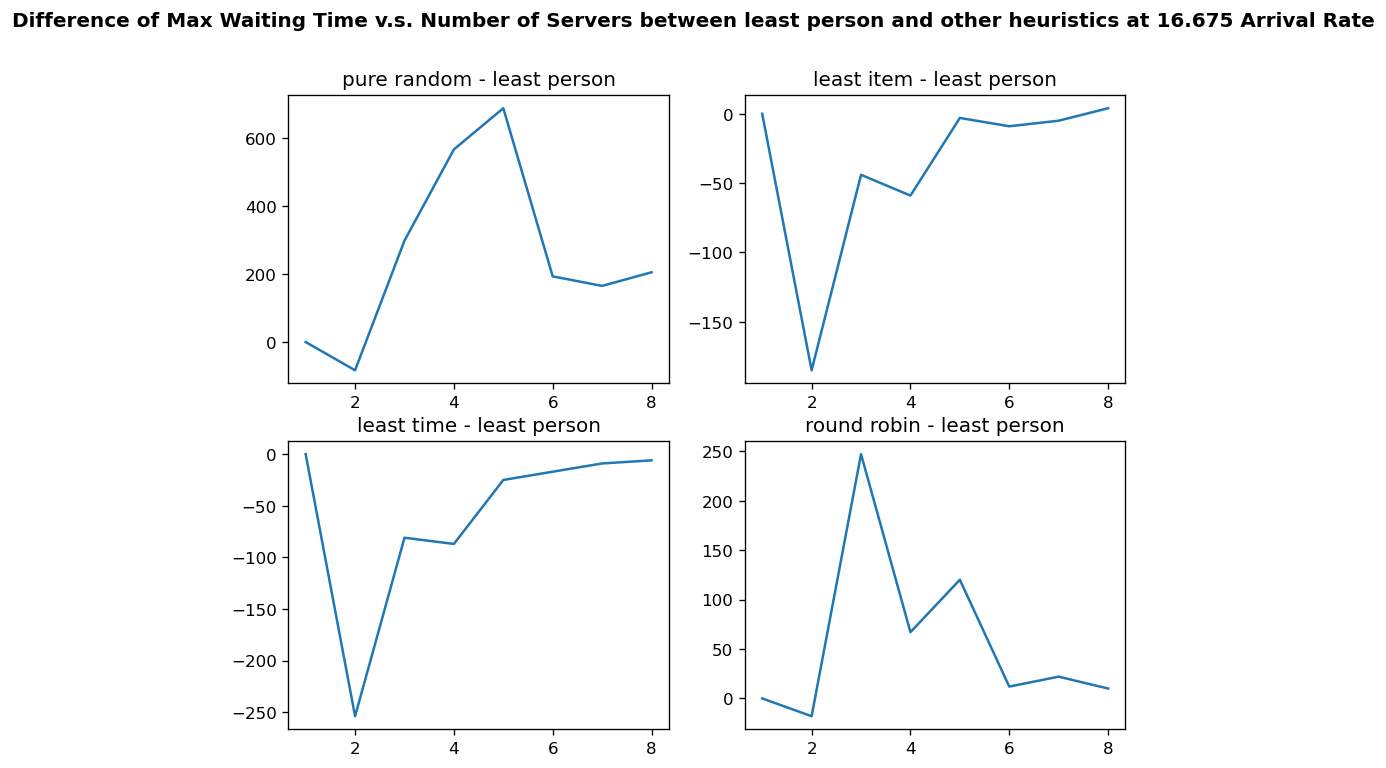

In [212]:
fig, axis = plt.subplots(2, 2, figsize=(9, 7))
axis[0][0].set_title("pure random - least person")
axis[0][0].plot(range(1,9), wt_pure_random[:, 2] - wt_least_person[:, 2])
axis[0][1].set_title("least item - least person")
axis[0][1].plot(range(1,9), wt_least_item[:, 2] - wt_least_person[:, 2])
axis[1][0].set_title("least time - least person")
axis[1][0].plot(range(1,9), wt_least_time[:, 2] - wt_least_person[:, 2])
axis[1][1].set_title("round robin - least person")
axis[1][1].plot(range(1,9), wt_round_robin[:, 2] - wt_least_person[:, 2])
fig.suptitle('Difference of Max Waiting Time v.s. Number of Servers between least person and other heuristics at 16.675 Arrival Rate',fontweight ="bold")

Text(0.5, 0.98, 'Difference of Mean Waiting Time v.s. Number of Servers between least person and other heuristics at 16.675 Arrival Rate')

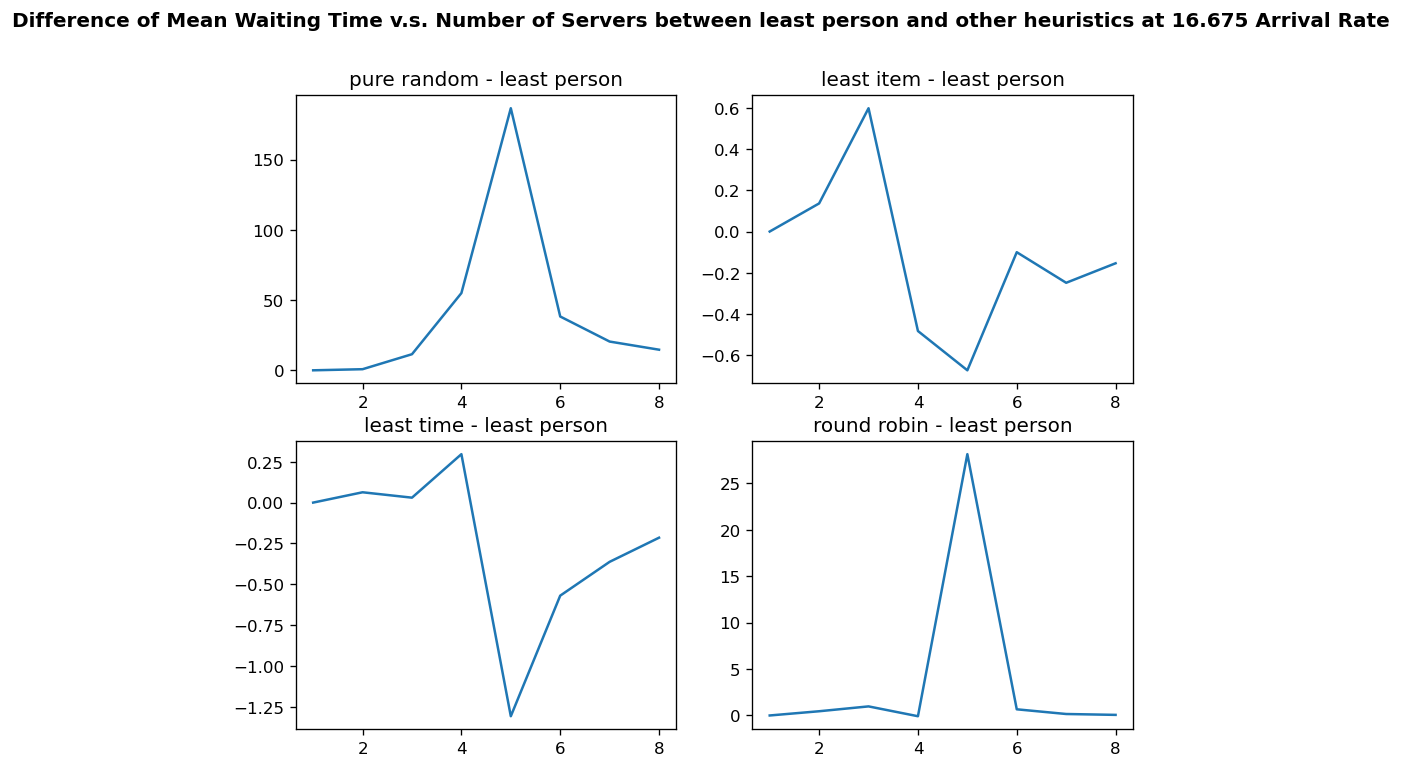

In [213]:
fig, axis = plt.subplots(2, 2, figsize=(9, 7))
axis[0][0].set_title("pure random - least person")
axis[0][0].plot(range(1,9), wt_pure_random[:, 1] - wt_least_person[:, 1])
axis[0][1].set_title("least item - least person")
axis[0][1].plot(range(1,9), wt_least_item[:, 1] - wt_least_person[:, 1])
axis[1][0].set_title("least time - least person")
axis[1][0].plot(range(1,9), wt_least_time[:, 1] - wt_least_person[:, 1])
axis[1][1].set_title("round robin - least person")
axis[1][1].plot(range(1,9), wt_round_robin[:, 1] - wt_least_person[:, 1])
fig.suptitle('Difference of Mean Waiting Time v.s. Number of Servers between least person and other heuristics at 16.675 Arrival Rate',fontweight ="bold")

Since the arrival rate was not varied very much from 25.2 to 16.675, we have the similar observation here. From an overall point of veiw, we can not see significant difference between each of the selection heuristics. 

The difference of the max waiting time between other heuristics and the least person heuristic indicate a similar result. Pure random heuristic adds to the waiting time significantly. The least item heuristic and the least time heuristic, however, performs better than the least person heuristic in a similar way. Both of them are not different from the least person when we only have 1 server(because there are no other lines to select), but as long as there are other lines available, they perform better than the least person, while this difference will wear off when there are more and more servers. The round robin heuristic still performs worse than least person, and their difference also follows the same trend, which means having more servers makes the line selection heuristic less important in terms of efficiency.

In terms of the difference of mean waiting times, we can observe that the least person heuristic still performs much better than the pure random one, while other heuristics do not have a significant difference with the least person heuristic.

In [215]:
# Define data generator
input_seed = 251
data_gen = DataGenerator(input_seed)

# Constant setting
SECOND_PER_MINUTE = 60

########## Simultaion settings ##########

# the unit interval, small value helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = 3600 * 6
MIN_ITEM = 1
MAX_ITEM = 20
MIN_SERVER = 1 # inclusive
MAX_SERVER = 8 # inclusive
ARRIVAL_RATE = 4.8 # customers per minute, inclusive
RANDOM_SEED = 996 # ensure same result across run

# Generate arrival data; this will be fixed across all runs
dist_params = [(
    0, TOTAL_TIMESTAMP,
    int(ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * ARRIVAL_RATE),
    "uniform", MIN_ITEM, MAX_ITEM
)] * (TOTAL_TIMESTAMP // ARRIVE_INTERVAL_SECOND)
initial_events_str = data_gen.generate_time_varying(dist_params)

Text(0.5, 0.98, 'Waiting Time v.s. Number of Servers for Different Line Selection Heuristics at 4.8 Arrival Rate')

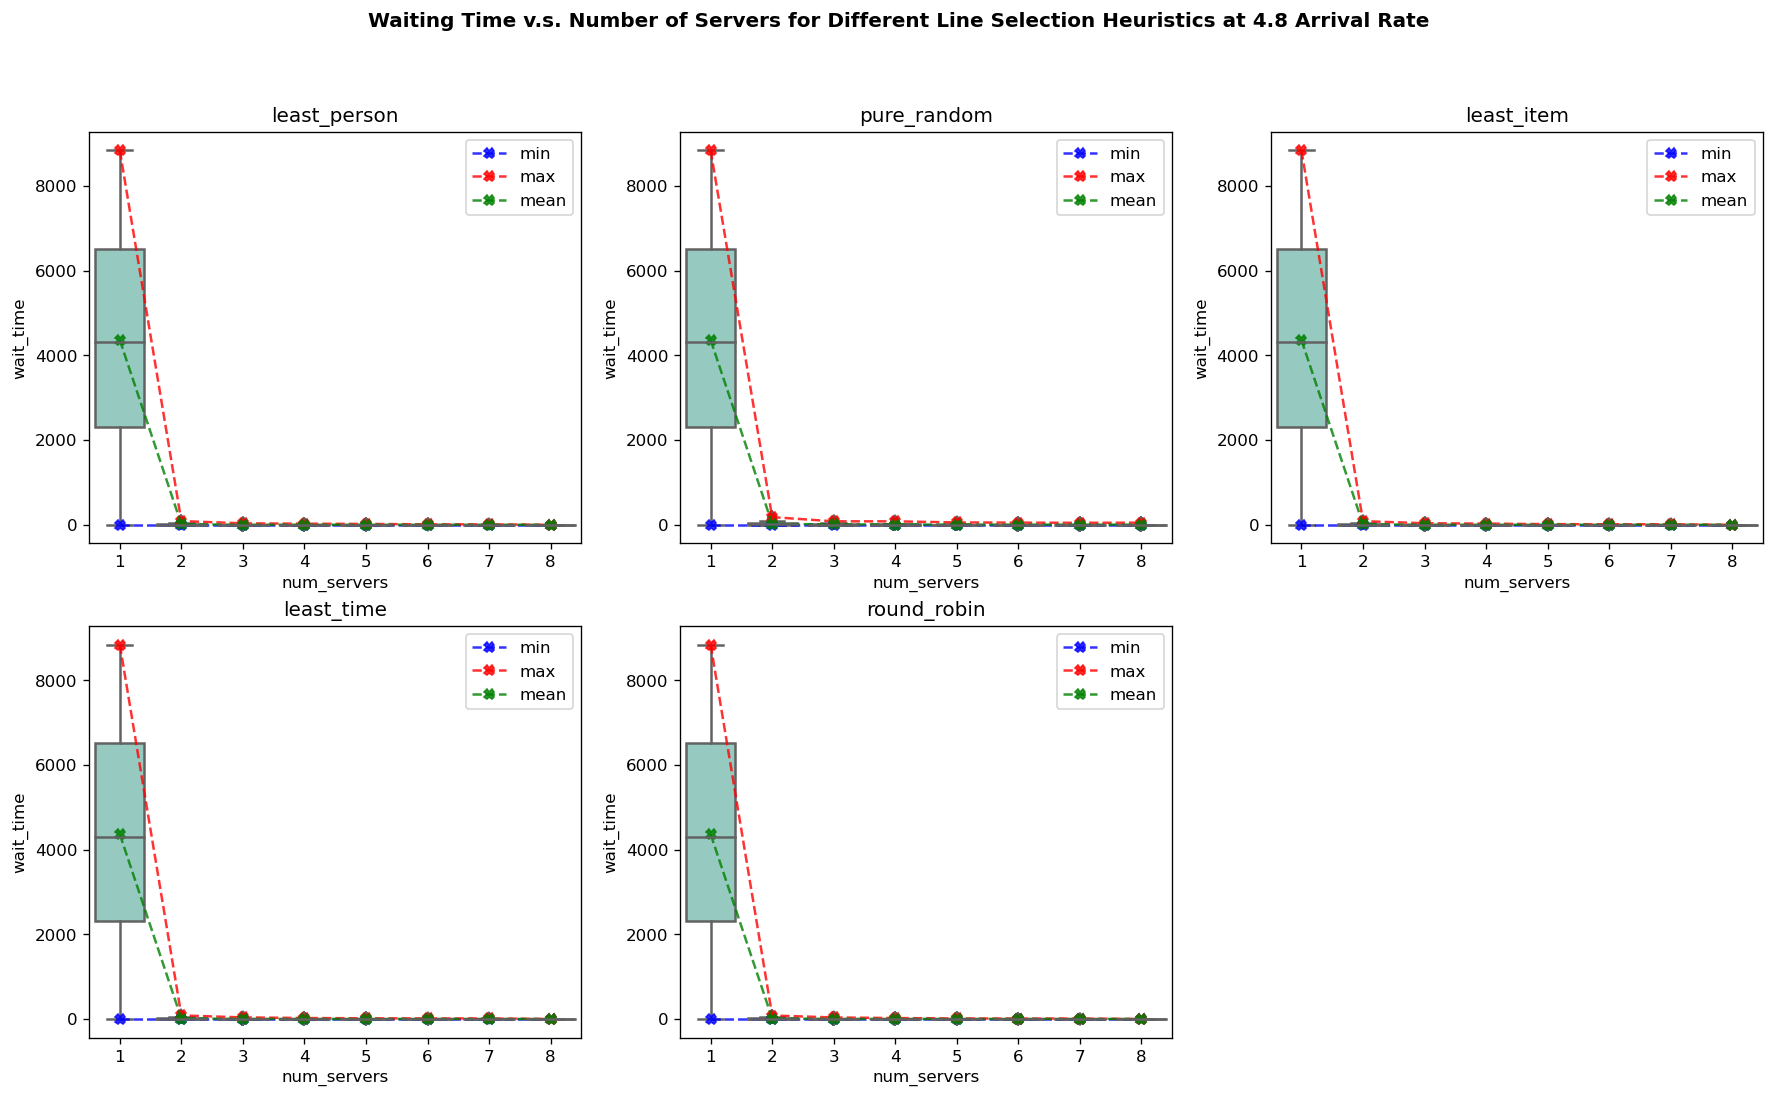

In [216]:
ARRIVAL_RATE = 4.8
fig, axis = plt.subplots(2, 3, figsize=(18, 10))
Utility.pick_checkout_line = Utility.pick_checkout_line_least_person
wt_least_person = sub_plotting(axis, 0, 0, "least_person")
Utility.pick_checkout_line = Utility.pick_checkout_line_pure_random
wt_pure_random = sub_plotting(axis, 0, 1, "pure_random")
Utility.pick_checkout_line = Utility.pick_checkout_line_least_item
wt_least_item = sub_plotting(axis, 0, 2, "least_item")
Utility.pick_checkout_line = Utility.pick_checkout_line_least_time
wt_least_time = sub_plotting(axis, 1, 0, "least_time")
Utility.pick_checkout_line = Utility.pick_checkout_line_round_robin
wt_round_robin = sub_plotting(axis, 1, 1, "round_robin")
axis[-1][-1].axis('off')
wt = {"least_person": wt_least_person, 
      "pure_random": wt_pure_random, 
      "least_item": wt_least_item, 
      "least_time": wt_least_time, 
      "round_robin": wt_round_robin}
fig.suptitle('Waiting Time v.s. Number of Servers for Different Line Selection Heuristics at 4.8 Arrival Rate',fontweight ="bold")

Text(0.5, 0.98, 'Difference of Max Waiting Time v.s. Number of Servers between least person and other heuristics at 25.2 Arrival Rate')

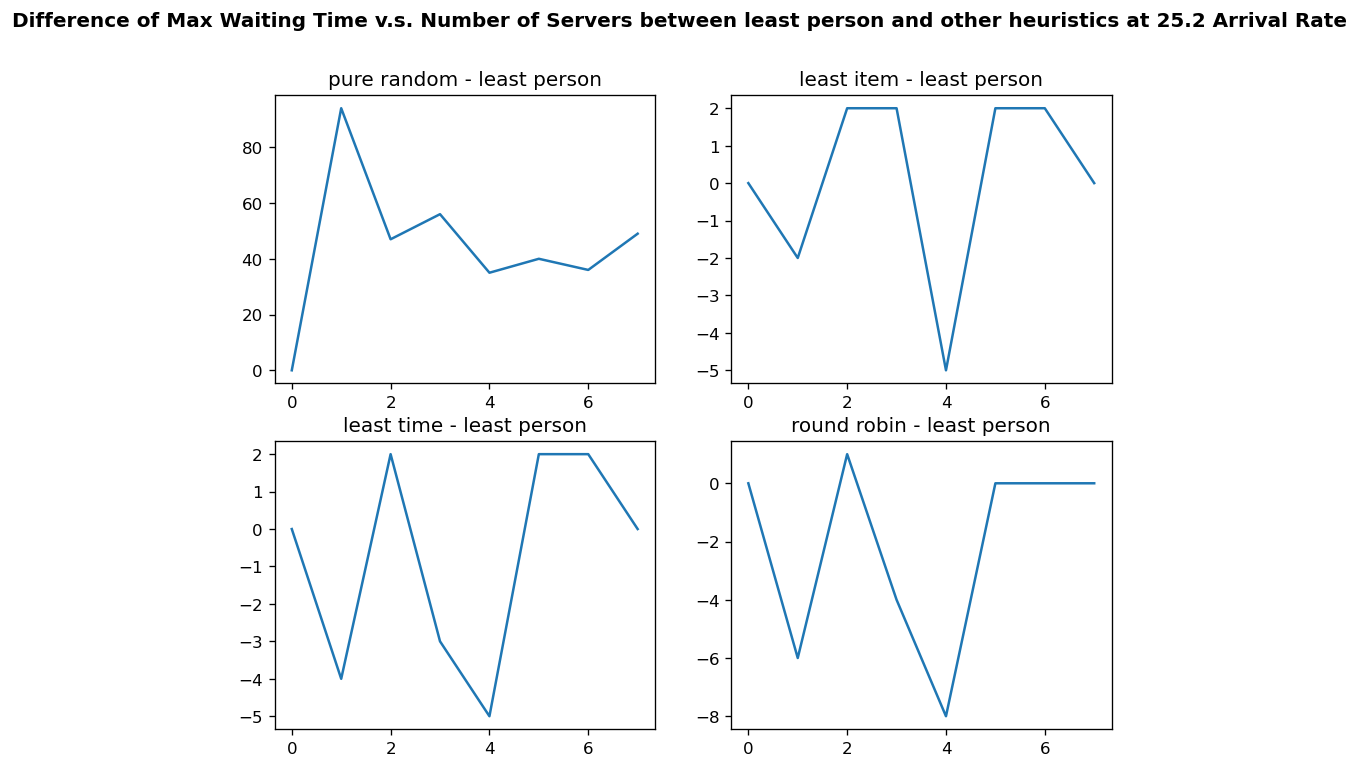

In [217]:
fig, axis = plt.subplots(2, 2, figsize=(9, 7))
axis[0][0].set_title("pure random - least person")
axis[0][0].plot(wt_pure_random[:, 2] - wt_least_person[:, 2])
axis[0][1].set_title("least item - least person")
axis[0][1].plot(wt_least_item[:, 2] - wt_least_person[:, 2])
axis[1][0].set_title("least time - least person")
axis[1][0].plot(wt_least_time[:, 2] - wt_least_person[:, 2])
axis[1][1].set_title("round robin - least person")
axis[1][1].plot(wt_round_robin[:, 2] - wt_least_person[:, 2])
fig.suptitle('Difference of Max Waiting Time v.s. Number of Servers between least person and other heuristics at 25.2 Arrival Rate',fontweight ="bold")

Text(0.5, 0.98, 'Difference of Mean Waiting Time v.s. Number of Servers between least person and other heuristics at 16.675 Arrival Rate')

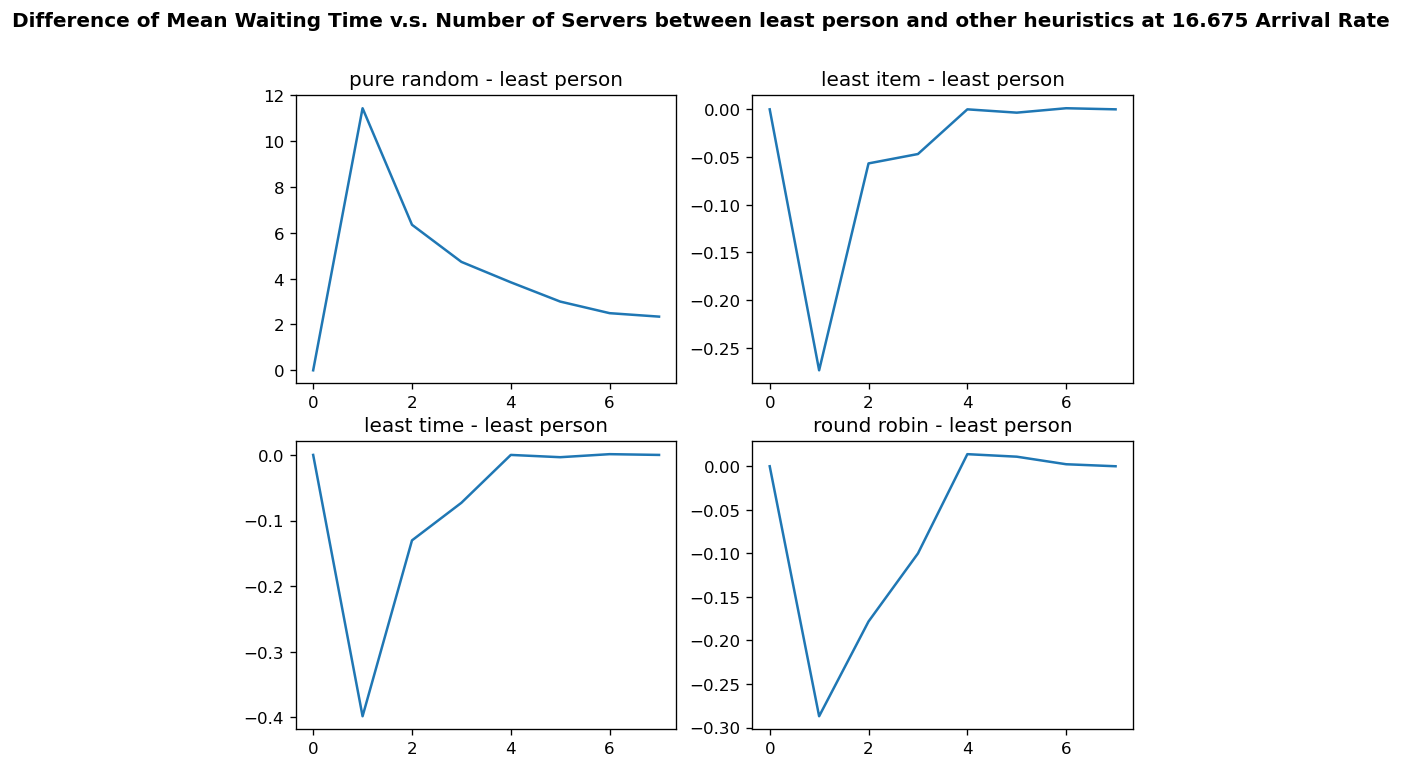

In [218]:
fig, axis = plt.subplots(2, 2, figsize=(9, 7))
axis[0][0].set_title("pure random - least person")
axis[0][0].plot(wt_pure_random[:, 1] - wt_least_person[:, 1])
axis[0][1].set_title("least item - least person")
axis[0][1].plot(wt_least_item[:, 1] - wt_least_person[:, 1])
axis[1][0].set_title("least time - least person")
axis[1][0].plot(wt_least_time[:, 1] - wt_least_person[:, 1])
axis[1][1].set_title("round robin - least person")
axis[1][1].plot(wt_round_robin[:, 1] - wt_least_person[:, 1])
fig.suptitle('Difference of Mean Waiting Time v.s. Number of Servers between least person and other heuristics at 16.675 Arrival Rate',fontweight ="bold")

When the arrival rate falls to 4.8, we can see that the waiting time converged to a small value as soon as we increased number of servers to 2, while adding servers did not reduce the waiting time as much as before when we have arrival rate of 25.2 or 16.675. This means when there are few shoppers, opening new checkout line does not help too much to the waiting time, which is true given our real life experience.

The difference of the max waiting time between pure random and least person still exists and is rather large when we have fewer servers, but such difference decreases as we add more servers. Other heurstics do not have significant different performance than the least person heuristic. The distribution of the mean waiting time between other heuristics and the least person follows the same pattern.

Overall, we can observe that the least person heurstic is a good enough heuristic for checkout line selection in grocery stores. While the optimal solutions, including the least time and the least item heuristic may perform better than least person, such difference in performance is usually much smaller than the difference between the least person and the pure random. The least person heuristic is also the most common to adopt than the two heuristics, as counting the person in a checkout line is much easier than counting the total number of items and estimating the total remaining time in the line. Round robin heuristic, however, is either worse or non-different in terms of performances than the least person heuristic, which indicates that regulated checking out, particularly letting checkout lines take customers in turns, does not help with the efficiency in the grocery store. 

### 2.4 Operation Cost & Satisfaction Optimization

There clearly exists a trade-off between the operation cost for opening checkout lines and the waiting time for customers, which is related to their level of satisfaction and customer loyalty, while keeping all checkout lines open regardless of the customer arrival rate is clearly infeasible in terms of minimizing the operational cost. Although cutomers' satisfaction is an important objective for grocery stores, there has not been a specific theory or study that indicates the relationship between customers' waiting time and their level of satisfaction in grocery stores, so satisfaction is rather difficult to quantify a continuous relationship between waiting time and satisfaction.

Nevertheless, according to an M.A.R.C research (2008) https://www.marcresearch.com/pdf/WaitTimes_June08_MeasurePR.pdf, which is an online survey conducted on approximately 13,000 consumers who visited 8 types of stores, including "Club, Consumer Electronics, Department, Drug, Grocery, Home Improvement, Mass Merchandisers, and Office Supply Stores". This survey indicates that "shopper's satisfaction remains high when in line four minutes or less in all store categories", except in "Club Stores". 

Thus, we decided to use the waiting time of 4 minutes as a threshold and examine the percentage of customers that are satisfied versus different number of servers. We will also do this for the max, mean, and min arrival rate to see the minimum number of servers needed in order to achieve a 80% satisfaction rate.

In [7]:
def sub_plotting(axis, x, y, title):
    pllt = axis[x][y]
    df = sim_result()
    # plot distribution
    sns.boxplot(ax = pllt, data=df, x="num_servers", y="wait_time", palette="Set3")#.set(xlabel=None, ylabel=None)

    # plot mean & extreme values
    wait_times = []
    for num_servers in server_range:
        target = df[df["num_servers"] == num_servers]["wait_time"]
        wait_times.append(
            np.array([target.min(), target.mean(), target.max()]))
    wait_times = np.array(wait_times)
    pllt.plot(wait_times[:, 0], "bX--", alpha=0.8, label="min")
    pllt.plot(wait_times[:, 2], "rX--", alpha=0.8, label="max")
    pllt.plot(wait_times[:, 1], "gX--", alpha=0.8, label="mean")

    pllt.set_title(title)
    pllt.legend()
    return wait_times

In [283]:
def plot_sat_percentage(df, axis, x, y, title):# plot distribution
    pllt = axis[x][y]
    sat = []
    for num_servers in server_range:
        target = df[df["num_servers"] == num_servers]["wait_time"]
        count = 0
        for i in target:
            if i < 4*60:
                count += 1
        sat.append(count/len(target))
    pllt.plot(range(1,9),sat, "black", label="% of satisfied")
    pllt.set_title(title)
    pllt.set(ylabel = "satisfcation_rate", xlabel = "num_servers")
    pllt.legend()

In [284]:
# Define data generator
Utility.pick_checkout_line = Utility.pick_checkout_line_least_person

input_seed = 251
data_gen = DataGenerator(input_seed)

# Constant setting
SECOND_PER_MINUTE = 60

########## Simultaion settings ##########

# the unit interval, small value helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = 3600 * 6
MIN_ITEM = 1
MAX_ITEM = 20
MIN_SERVER = 1 # inclusive
MAX_SERVER = 8 # inclusive
ARRIVAL_RATE = 25.2 # customers per minute, inclusive
RANDOM_SEED = 996 # ensure same result across run

# Generate arrival data; this will be fixed across all runs
dist_params = [(
    0, TOTAL_TIMESTAMP,
    int(ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * ARRIVAL_RATE),
    "uniform", MIN_ITEM, MAX_ITEM
)] * (TOTAL_TIMESTAMP // ARRIVE_INTERVAL_SECOND)
initial_events_str = data_gen.generate_time_varying(dist_params)

Text(0.5, 0.98, 'Arrival rate = 25.2')

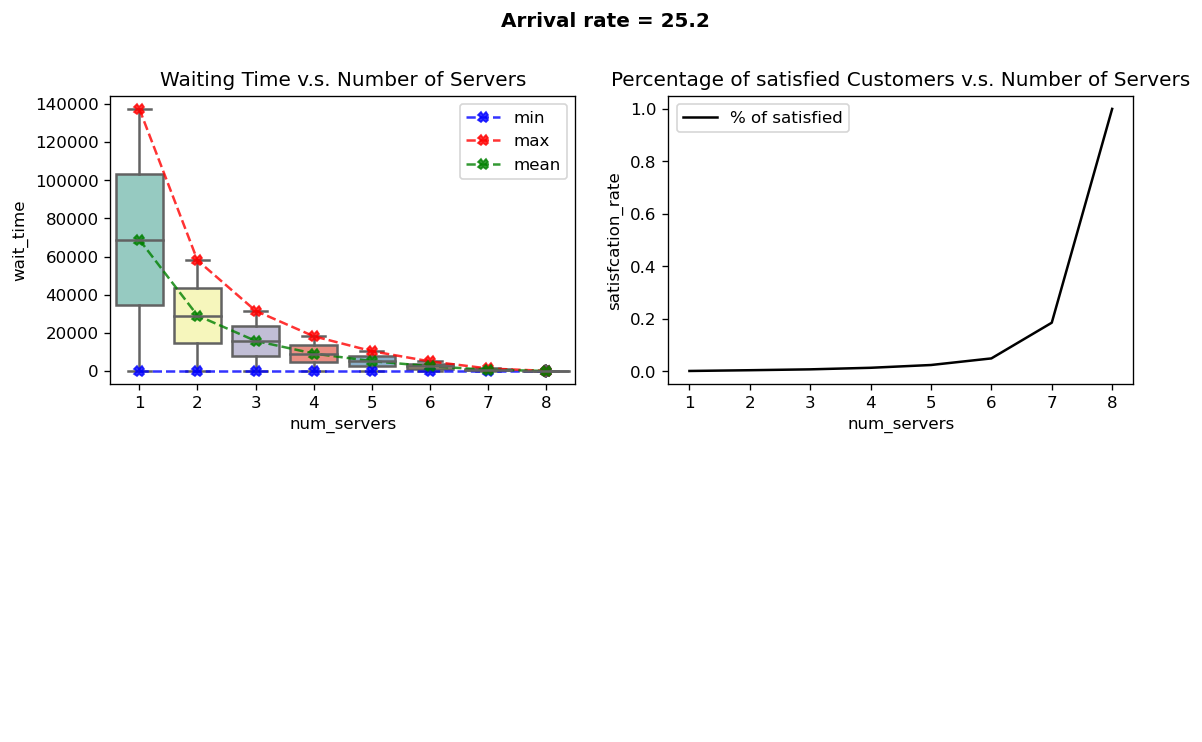

In [285]:
fig, axis = plt.subplots(2, 2, figsize=(11, 7))
sub_plotting(axis, 0, 0, "Waiting Time v.s. Number of Servers")
df = sim_result()
plot_sat_percentage(df, axis, 0 ,1, "Percentage of satisfied Customers v.s. Number of Servers")
axis[1][0].axis('off')
axis[1][1].axis('off')
fig.suptitle("Arrival rate = 25.2",fontweight ="bold")

Here we see that the percentage of satisfied customers is approximately 0 to start with, while it is only around 0.2 when we have 7 servers. However, when we have 8 servers, the satisfaction rate goes up to 100%, which means we need to open all checkout lines during the peak hours given our store setting.

In [286]:
# Define data generator
Utility.pick_checkout_line = Utility.pick_checkout_line_least_person

input_seed = 251
data_gen = DataGenerator(input_seed)

# Constant setting
SECOND_PER_MINUTE = 60

########## Simultaion settings ##########

# the unit interval, small value helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = 3600 * 6
MIN_ITEM = 1
MAX_ITEM = 20
MIN_SERVER = 1 # inclusive
MAX_SERVER = 8 # inclusive
ARRIVAL_RATE = 16.675 # customers per minute, inclusive
RANDOM_SEED = 996 # ensure same result across run

# Generate arrival data; this will be fixed across all runs
dist_params = [(
    0, TOTAL_TIMESTAMP,
    int(ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * ARRIVAL_RATE),
    "uniform", MIN_ITEM, MAX_ITEM
)] * (TOTAL_TIMESTAMP // ARRIVE_INTERVAL_SECOND)
initial_events_str = data_gen.generate_time_varying(dist_params)

Text(0.5, 0.98, 'Arrival rate = 16.675')

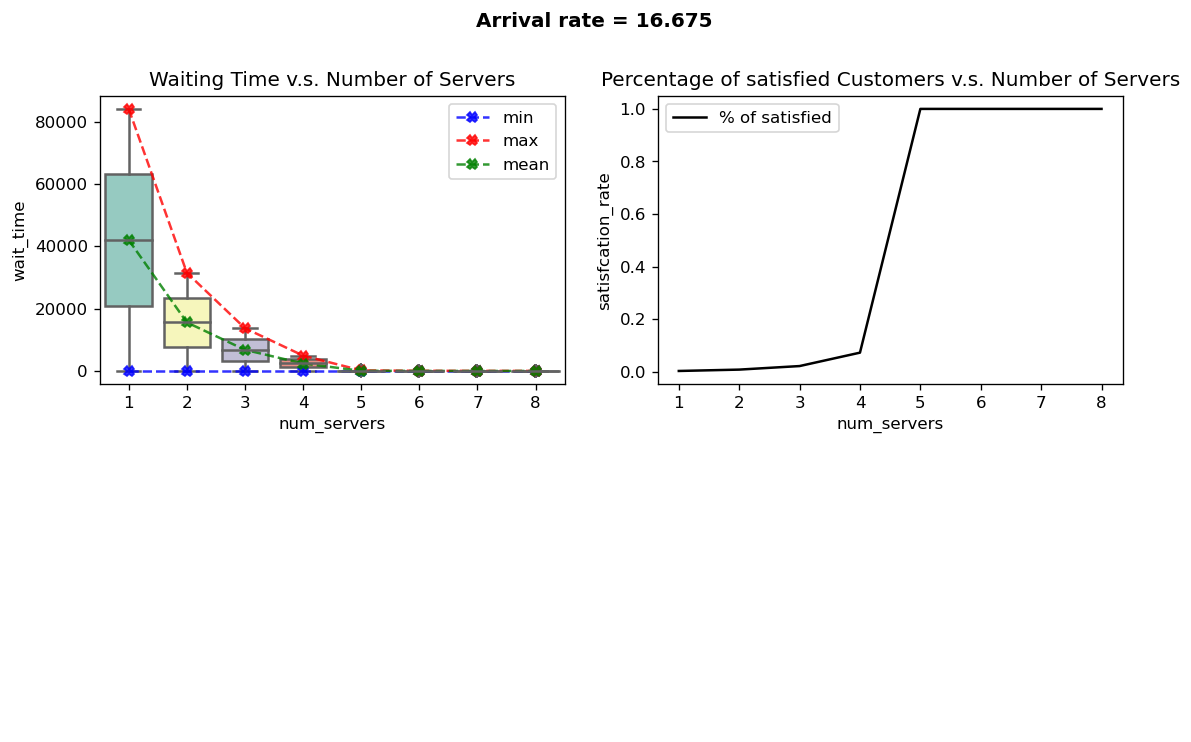

In [287]:
fig, axis = plt.subplots(2, 2, figsize=(11, 7))
sub_plotting(axis, 0, 0, "Waiting Time v.s. Number of Servers")
df = sim_result()
plot_sat_percentage(df, axis, 0 ,1, "Percentage of satisfied Customers v.s. Number of Servers")
axis[1][0].axis('off')
axis[1][1].axis('off')
fig.suptitle("Arrival rate = 16.675",fontweight ="bold")

If we are given a 16.675 arrival rate, we see that opening 5 servers would make most of customers satisfied, so it is actually less servers required than the peak hours.

In [288]:
# Define data generator
Utility.pick_checkout_line = Utility.pick_checkout_line_least_person

input_seed = 251
data_gen = DataGenerator(input_seed)

# Constant setting
SECOND_PER_MINUTE = 60

########## Simultaion settings ##########

# the unit interval, small value helps smooth arrival distribution
ARRIVE_INTERVAL_SECOND = 3600

# total simulation time during which customers arrive
TOTAL_TIMESTAMP = 3600 * 6
MIN_ITEM = 1
MAX_ITEM = 20
MIN_SERVER = 1 # inclusive
MAX_SERVER = 8 # inclusive
ARRIVAL_RATE = 4.8 # customers per minute, inclusive
RANDOM_SEED = 996 # ensure same result across run

# Generate arrival data; this will be fixed across all runs
dist_params = [(
    0, TOTAL_TIMESTAMP,
    int(ARRIVE_INTERVAL_SECOND / SECOND_PER_MINUTE * ARRIVAL_RATE),
    "uniform", MIN_ITEM, MAX_ITEM
)] * (TOTAL_TIMESTAMP // ARRIVE_INTERVAL_SECOND)
initial_events_str = data_gen.generate_time_varying(dist_params)

Text(0.5, 0.98, 'Arrival rate = 4.8')

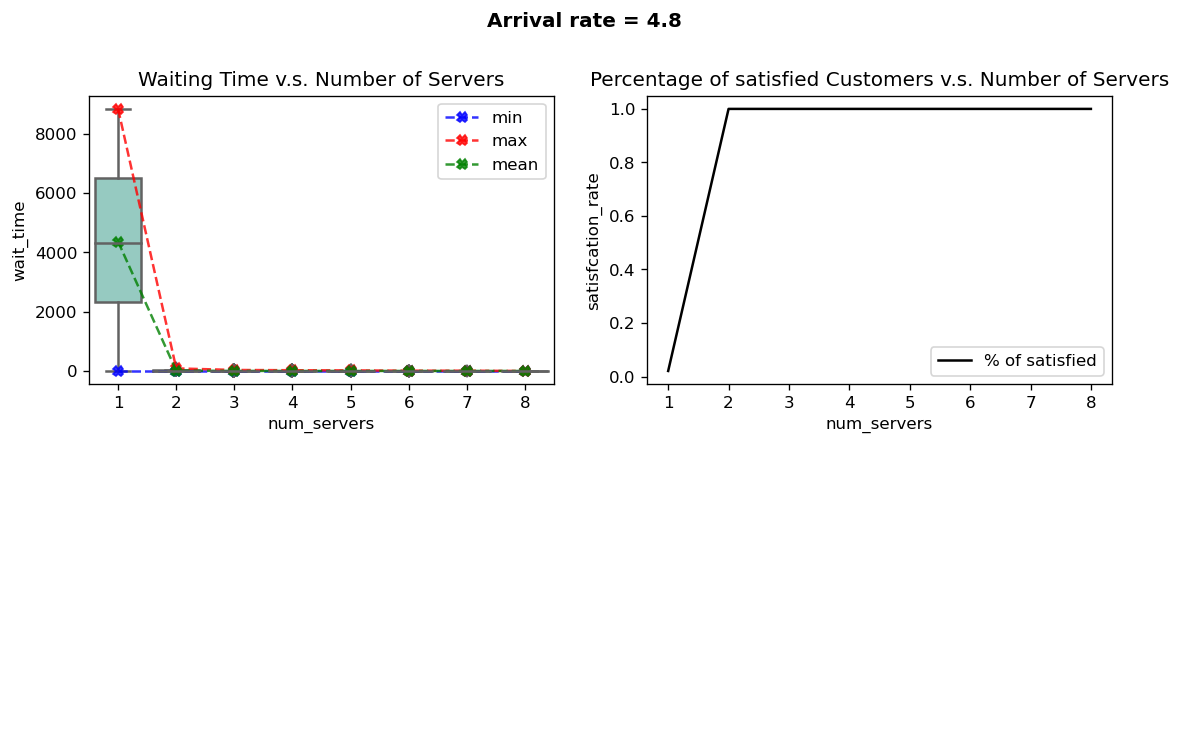

In [290]:
fig, axis = plt.subplots(2, 2, figsize=(11, 7))
sub_plotting(axis, 0, 0, "Waiting Time v.s. Number of Servers")
df = sim_result()
plot_sat_percentage(df, axis, 0 ,1, "Percentage of satisfied Customers v.s. Number of Servers")
axis[1][0].axis('off')
axis[1][1].axis('off')
fig.suptitle("Arrival rate = 4.8",fontweight ="bold")

If we are given a 4.8 arrival rate, which is the case for the grocery store during 6-7 a.m., we see that opening 2 lines would make most customers satisfied. Thus, we do not need to open all lines throughout the day, and opening lines according to the estimated level of satisfaction may be a good strategy for the grocery stores.

## Part 3 Conclusion

In the first part of experimentation, we use our checkout simulator to demonstrate and verify some famous formula and equalities in queuing theory, including those for the average wait time, throughput, and Little’s Law. The experiments are first done on a single checkout line (server) and then extend to multiple servers. We then apply our findings to real-world data and develop an adaptive line schedule algorithm to optimize checkout utilization.

There are several further extensions which are possible to explore within the current framework. One of the assumptions made in our model is that the checkout zone is an integrated area for the scanning and the payment process. However, in some grocery stores, the payment area is separated from the scanning area and may cause extra time to finish the process.  Thus, we may extend our model to separate the payment process from the checkout process so that a new area is created. We may add separated stations called payment stations after checkout stations. Another thing we may take into account is that the current model does not include jockeying, which means that some customers may jockey at the ends of long lines to save time in reality. Therefore, we may extend our model to examine the effect of jockeying on waiting time.

Our project constructs a simulation system for the checking out behaviors in a grocery store and provides a strategy for maximizing customers' satisfcation while minimizing the operation cost of opening checkout lines. However, our relationship between satisfcation and waiting time is rather simple due to the lack of sources and related researches, so to serve a better economic and managerial value, we will need more ground researches in terms of waiting time, satisfcation, the commercial value of satisfcation, and the operation costs for opening multiple checkout lines, such as determining a more fine-grained relationship with more data source, determining a relationship between customers' satisfcation and revenue, and determining the operational cost of opening lines taking into account of servers' wage, the cost of buying POS machines, and the depreciation of POS machines.

### Division of Work

**- Fei Ding -**
- Simulator implementation
- Data generator implementation
- Real world data collection (Google Map)
- Queuing theory verification
- Validation by designing an adaptive checkout algorithm

**- Xiaoran Zhu -**
- literature review
- checkout line type modeling & experimentation
- single queue modeling & experimentation
- multi queue modeling & experimentation

**- Zhengyang Qi -**
- literature review
- real world data collection
- line selection heuristics modeling & experimentation
- satisfaction optimization
- waiting time vs arrival modeling & rate experimentation

### References

Manuel D. Rossetti and Anh T. Pham. 2015. Simulation modeling of customer checkout configurations. In
<i>Proceedings of the 2015 Winter Simulation Conference</i> (<i>WSC '15</i>). IEEE Press, 1151–1162.

Opara-Nadi, G. 2005. “Electronic Self-Checkout System Vs Cashier Operated System-a Performance Based Comparative Analysis.”Ph.D. thesis, Capella University.

R. N. Rechtschaffen, "Queuing simulation using a random number generator," in IBM Systems Journal,
vol. 11, no. 3, pp. 255-271, 1972. doi: 10.1147/sj.113.0255
http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=5388236&isnumber=5388231

Schimmel, M. 2013. “Deployment of Express Checkout Lines at Supermarkets.”
https://www.few.vu.nl/en/Images/werkstuk-schimmel_tcm39-335266.pdf.

M/A/R/C Research. “How Do Your Customers Respond To Long Wait Times? Many Leave Empty Handed!” M/A/R/C Research, 27 June 2008, www.marcresearch.com/pdf/WaitTimes_June08_MeasurePR.pdf. 